### **Explaining Monthly Average Stock Returns Around 5 Stock Market Crashes (1987-2022) 📉**
### Author: Robert Zhang
Colab Link: https://drive.google.com/file/d/1IW_RJy9SQg1g3G9iLnT3eugI05Iv89Ye/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ***Report Objective:*** Analyzing relationship between stock returns $(R_i)$ and financial ratios around 5 market crashes
>**Overview:** Steps (5) – (12) are presented below for **market crashes in 1987, 2000, 2008, 2020, and 2022.** We first filter the `CRSP` dataframe for specific stock return data (`crash_return`) during the distinct market crash periods, and then merge the resulting df with the corresponding `Compustat` data to calculate regression coefficients based on various fundamental ratios. Interpretations of regression coefficients and results are discussed for each amrket period. 

---
### **1987 1987 Stock Market Crash (Sept 1987 – Dec 1987)**

In [ ]:
Rt_1987 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/CRSP-1983-1987.csv')
display(Rt_1987.info())
# filter for event-specific returns
crash_data = Rt_1987[Rt_1987["date"] > '1987-08-31']
crash_return = pd.DataFrame(crash_data.groupby('TICKER')['RET'].mean()).reset_index()
display(crash_return)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377958 entries, 0 to 377957
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PERMNO  377958 non-null  int64  
 1   date    377958 non-null  object 
 2   TICKER  377921 non-null  object 
 3   CUSIP   377958 non-null  object 
 4   RET     377958 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.4+ MB


None

,TICKER,RET
0,A,-0.152742
1,AA,-0.019691
2,AAA,0.011342
3,AAC,-0.056673
4,AAGIY,-0.035499
...,...,...
7328,ZRN,-0.080992
7329,ZRO,-0.040455
7330,ZSILF,-0.231214
7331,ZTCLF,-0.122449


- **`crash_data`**: Keeps only stock returns for Sept 1987 - Dec 1987 since this is the timeframe for the first crash event.

- **`crash_return`:** Calculates average monthly stock return for period between $09/1987-12/1987$ for each ticker. In this dataset, there are 7333 tickers and their respective returns in the crash period. 

- Combine `crash_return` with the corresponding `Compustat-1986.csv` file into a merged dataset for regression analysis. Since tickers in the Compustat dataset is not standardized, we need some data cleaning & transformation before merging on `tic`. 

In [ ]:
Compustat_1986 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/Compustat-1986.csv')
# merge 2 df on ticker
merged_1987 = pd.merge(crash_return, Compustat_1986, left_on='TICKER', right_on='tic')
merged_1987 = merged_1987.drop(['gvkey', 'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'costat'], axis=1)

merged_1987['se'] = merged_1987['at'] - merged_1987['lt']
merged_1987['GP'] = merged_1987['sale'] - merged_1987['cogs']
display(merged_1987.tail())
display(merged_1987.info())

,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se,GP
1663,ZMX,-0.064006,1986-12-31,1986,INDL,21.769,34.456,5.390,28.820,0.000,7.093,7.770,1.883,17.227,35.130,26.686,6.310
1664,ZNT,-0.092420,1986-12-31,1986,INDL,NaN,813.705,0.484,367.208,15.467,NaN,543.954,42.151,57.032,410.977,269.751,43.769
1665,ZOND,-0.122548,1986-12-31,1986,INDL,52.353,71.653,2.707,54.855,12.391,26.946,40.355,2.173,13.652,103.492,31.298,48.637
1666,ZRN,-0.080992,1987-03-31,1986,INDL,208.707,303.193,49.370,282.376,13.832,85.065,123.782,17.470,145.134,383.306,179.411,100.930
1667,ZRO,-0.040455,1987-03-31,1986,INDL,79.006,118.570,36.109,75.055,6.722,18.260,31.371,11.602,60.328,125.699,87.199,50.644


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668 entries, 0 to 1667
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TICKER    1668 non-null   object 
 1   RET       1668 non-null   float64
 2   datadate  1668 non-null   object 
 3   fyear     1668 non-null   int64  
 4   indfmt    1668 non-null   object 
 5   act       1500 non-null   float64
 6   at        1668 non-null   float64
 7   che       1668 non-null   float64
 8   cogs      1667 non-null   float64
 9   dltt      1667 non-null   float64
 10  lct       1536 non-null   float64
 11  lt        1668 non-null   float64
 12  ni        1668 non-null   float64
 13  re        1651 non-null   float64
 14  sale      1668 non-null   float64
 15  se        1668 non-null   float64
 16  GP        1667 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 234.6+ KB


None

- After merging on ticker symbol, we have 1668 companies left compared to the original 7333 companies in Compustat. Columns with null values are `act`, `cogs`, `dltt`, `lct`, and `re`. **Since financial data have relationships with one another, missing values can be predicted using other columns through regression.** We choose to use regression imputation of missing values instead of winsorizing or mean/median imputation since company-specific regression brings meanings meaning to numbers. Also, companies all have different scale and revenue size that bring challenges to winsorizing and simple imputation (i.e., distorting the big picture).

#### **Regression Imputation of Missing Variables**

In [ ]:
from sklearn.linear_model import LinearRegression

#create copy of merged_1987 df for imputation of missing values
reg_data = merged_1987[['TICKER', 'datadate', 'act', 'cogs', 'dltt', 'lct', 're', 'che', 'lt', 'ni', 'sale']].copy()
reg_data = reg_data.dropna(subset=['che', 'lt', 'ni', 'sale']) #independent variables

#seperate missings from complete data
complete_data = reg_data.dropna() #drop null values in training set
missing_data = reg_data[reg_data.isna().any(axis=1)] #use rows with null for training set

#define variables
X_cols = ['che', 'lt', 'ni', 'sale']
y_cols = ['act', 'cogs', 'dltt', 'lct', 're']

#regression imputation of missing value NaN.
reg_model = LinearRegression()
reg_model.fit(complete_data[X_cols], complete_data[y_cols])
imputed_values = reg_model.predict(missing_data[X_cols])
merged_1987.loc[missing_data.index, y_cols] = imputed_values

display(merged_1987.describe())
display(merged_1987.tail())

,RET,fyear,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se,GP
count,1668.000000,1668.0,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1667.000000
mean,-0.071140,1986.0,535.593060,1520.799920,152.676499,622.779279,465.345784,388.015778,1086.762634,47.919781,326.985194,1031.917171,434.037287,293.402941
std,0.071579,0.0,2479.310846,6457.650254,1013.781688,4109.169186,2375.174831,1855.198775,5249.759525,250.235080,1561.692497,5031.671485,1919.094948,1306.584532
min,-0.435185,1986.0,0.000000,0.092000,-1.086000,-23479.278785,0.000000,-29.925425,0.000000,-2017.521000,-2642.146981,0.004000,-1025.196000,-57.440000
25%,-0.110276,1986.0,8.659000,15.618250,1.201750,4.753500,0.893750,2.777000,5.612000,0.053500,0.841000,14.507250,6.792750,4.745000
50%,-0.066137,1986.0,35.390381,65.072500,5.597000,33.698000,10.021500,14.549500,29.548000,2.312000,15.956723,72.622000,30.748000,22.317000
75%,-0.029709,1986.0,170.325750,411.876750,28.951250,201.095500,82.449997,86.566750,220.774750,16.984500,106.090500,381.611000,161.935750,113.636000
max,0.400000,1986.0,56982.411211,117086.000000,32041.707000,94530.625000,46970.571092,38026.184689,111411.608000,4789.000000,28141.008000,102813.000000,37712.000000,31860.012000


,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se,GP
1663,ZMX,-0.064006,1986-12-31,1986,INDL,21.769000,34.456,5.390,28.820000,0.000000,7.093000,7.770,1.883,17.227000,35.130,26.686,6.310
1664,ZNT,-0.092420,1986-12-31,1986,INDL,180.934722,813.705,0.484,176.478147,289.021484,121.579054,543.954,42.151,169.383486,410.977,269.751,43.769
1665,ZOND,-0.122548,1986-12-31,1986,INDL,52.353000,71.653,2.707,54.855000,12.391000,26.946000,40.355,2.173,13.652000,103.492,31.298,48.637
1666,ZRN,-0.080992,1987-03-31,1986,INDL,208.707000,303.193,49.370,282.376000,13.832000,85.065000,123.782,17.470,145.134000,383.306,179.411,100.930
1667,ZRO,-0.040455,1987-03-31,1986,INDL,79.006000,118.570,36.109,75.055000,6.722000,18.260000,31.371,11.602,60.328000,125.699,87.199,50.644


- **Observation:** Previously, before the regression imputation of `merged_1987` df, we saw that `act`, `cogs`, `dltt`, `lct`, `re` all have NaNs. Now, with company-specific regression imputation, they have 1668 complete observations. 
    - ***Rationality Check:*** For example, observation 1664 with ticker `ZNT` previously had no `act` and `lct` numbers. After regression imputation, it makes sense to see a smaller current assets compared to total assets (180 vs 813), and a smaller current liabilities compared to total liabilities (121 vs 543). 
- We need to further winsorize variables with min of 0 to avoid infinite values in calculating ratios. 

In [ ]:
# winsorize act, dltt, lct, and lt. 
from scipy.stats.mstats import winsorize

# Winsorize 'act', 'dltt', 'lct', and 'lt'
merged_1987['act'] = winsorize(merged_1987['act'], limits=(0.05,0.05))
merged_1987['dltt'] = winsorize(merged_1987['dltt'], limits=(0.05,0.05))
merged_1987['lct'] = winsorize(merged_1987['lct'], limits=(0.05,0.05))
merged_1987['lt'] = winsorize(merged_1987['lt'], limits=(0.05,0.05))

#### **Create Financial Ratios: $ROA, ROE, Debt/Asset, Net \ Margin, and \ Asset \ Turnover$**

In [ ]:
# ROA
merged_1987['ROA'] = merged_1987['ni']/merged_1987['at']
# ROE
merged_1987['ROE'] = merged_1987['ni']/merged_1987['se']
merged_1987['ROE'] = np.log(merged_1987['ROE'])
# Asset turnover
merged_1987['asset_turn'] = merged_1987['sale']/merged_1987['at']
merged_1987['asset_turn'] = np.log(merged_1987['asset_turn'])
# Net profit margin
merged_1987['net_margin'] = merged_1987['ni']/merged_1987['sale']
merged_1987['net_margin'] = np.log(merged_1987['net_margin'])
# Long Tem Debt to Total Assets Ratio
merged_1987['debt_asset'] = merged_1987['dltt']/merged_1987['at']
merged_1987['debt_asset'] = np.log(merged_1987['debt_asset'])

display(merged_1987.describe())

,RET,fyear,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se,GP,ROA,ROE,asset_turn,net_margin,debt_asset
count,1668.000000,1668.0,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1667.000000,1668.000000,1282.000000,1668.000000,1275.000000,1480.000000
mean,-0.071140,1986.0,278.745077,1520.799920,152.676499,622.779279,220.667945,186.616643,527.742412,47.919781,326.985194,1031.917171,434.037287,293.402941,0.001970,-2.124497,-0.194502,-2.954077,-1.985466
std,0.071579,0.0,581.602640,6457.650254,1013.781688,4109.169186,535.116555,411.968781,1211.795602,250.235080,1561.692497,5031.671485,1919.094948,1306.584532,0.280022,1.083665,0.985264,1.124162,1.357428
min,-0.435185,1986.0,1.244000,0.092000,-1.086000,-23479.278785,0.000000,0.154000,0.629000,-2017.521000,-2642.146981,0.004000,-1025.196000,-57.440000,-3.124356,-9.710176,-6.065222,-9.374413,-8.839132
25%,-0.110276,1986.0,8.659000,15.618250,1.201750,4.753500,0.893750,2.777000,5.612000,0.053500,0.841000,14.507250,6.792750,4.745000,0.002322,-2.455384,-0.584377,-3.395480,-2.533109
50%,-0.066137,1986.0,35.390381,65.072500,5.597000,33.698000,10.021500,14.549500,29.548000,2.312000,15.956723,72.622000,30.748000,22.317000,0.042175,-2.012752,0.040331,-2.860155,-1.668647
75%,-0.029709,1986.0,170.325750,411.876750,28.951250,201.095500,82.449997,86.566750,220.774750,16.984500,106.090500,381.611000,161.935750,113.636000,0.078386,-1.687137,0.423082,-2.297407,-1.126027
max,0.400000,1986.0,2281.200000,117086.000000,32041.707000,94530.625000,2127.000000,1589.648000,4744.631000,4789.000000,28141.008000,102813.000000,37712.000000,31860.012000,4.377754,3.293656,2.198692,0.628215,3.628205


- After calculating ratios based on regression imputation, we avoided the possibility to have ratios with infinite values that's impossible to interpret. All ratios now have 1668 complete observations. 
- **Additonally, all ratios except $ROA$ are transformed to the log form to avoid impacts of extreme outliers.** $ROA$ itself has a lower standard deviation and interquartile range compared to the remaining 3, so it's kept as it is calculated. 

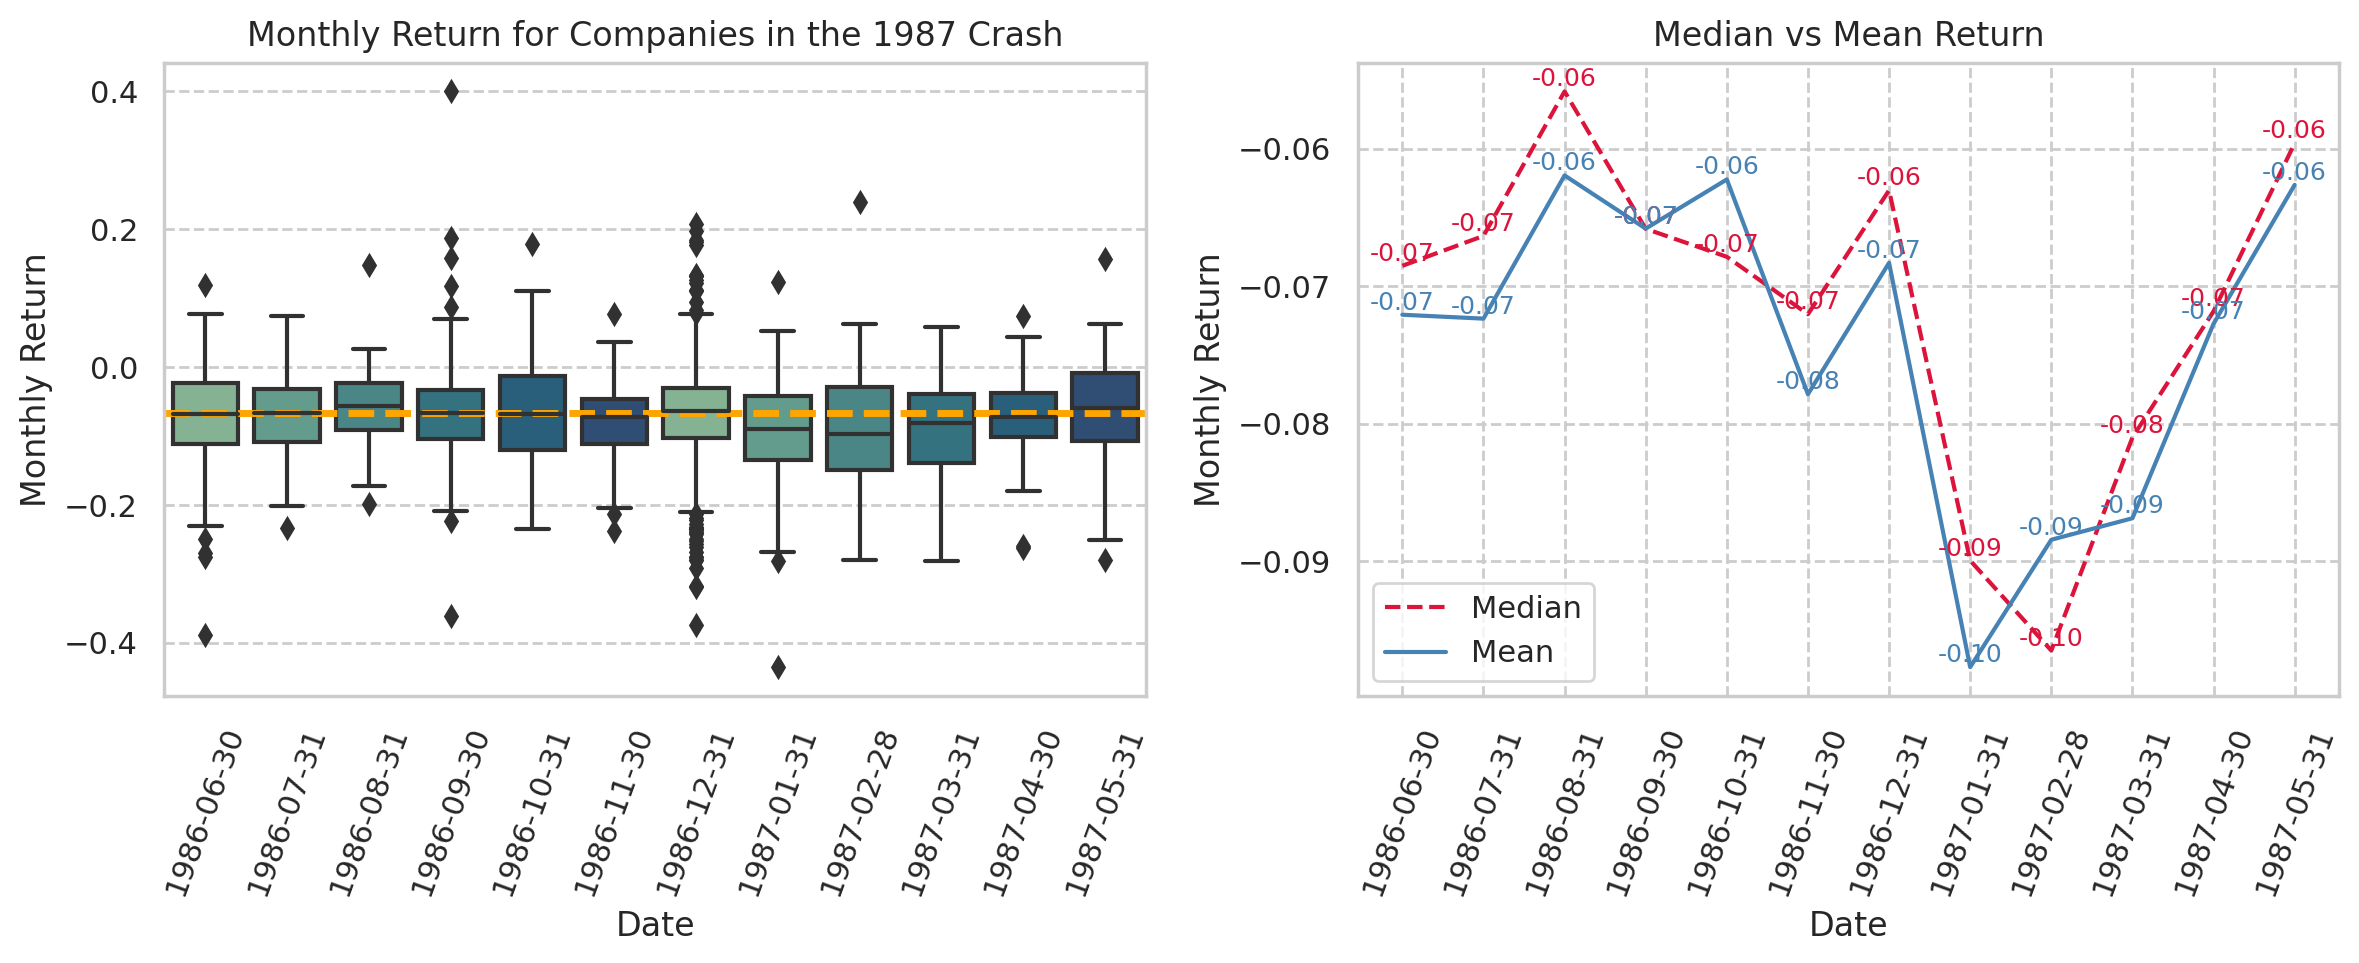

In [ ]:
# Analyzing stock returns over the crash period
palette = sns.color_palette('crest')
# Sort the dataframe by datadate
merged_1987 = merged_1987.sort_values('datadate')
median_return = merged_1987['RET'].median()
mean_return = merged_1987['RET'].mean()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# Boxplot on avg RET distribution
sns.boxplot(x='datadate', y='RET', data=merged_1987, palette=palette, ax=ax1)
ax1.axhline(y=median_return, color='orange', linestyle='--', linewidth=2.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return')
ax1.set_xticklabels(labels=merged_1987['datadate'].unique(), rotation=70)
ax1.set_title('Monthly Return for Companies in the 1987 Crash')
# Line plot on avg vs median RET comparison
x = merged_1987['datadate'].unique()
y_median = merged_1987.groupby('datadate')['RET'].median().values
y_mean = merged_1987.groupby('datadate')['RET'].mean().values
ax2.plot(x, y_median, color='crimson', linestyle='--', label='Median')
ax2.plot(x, y_mean, color='steelblue', linestyle='-', label='Mean')
ax2.set_xlabel('Date')
ax2.set_ylabel('Monthly Return')
ax2.set_xticklabels(labels=x, rotation=70)
ax2.set_title('Median vs Mean Return')
ax2.legend()
# Add data labels on the line plot
for i, (xi, yi) in enumerate(zip(x, y_median)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='crimson')
for i, (xi, yi) in enumerate(zip(x, y_mean)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='steelblue')
fig.tight_layout()
plt.show()

- Monthly average returns from $1986/06/30 - 1987/05/31$ uniformly fell below 0%, with only a few outliers each month reaching above 0%. 12/1986 has the most stock return volatility on both side of the spectrum as investors dump losers and re-buy new positions in January. The orange dotted line depicts the median stock return over the entire crash period, which is also below 0%.
- Market experienced significant sell-off from 12/1986-01/1987, with median $R_i$ dropping from -6% to -9%. 

#### **Regressing Returns $(R_{Stock})$ on Financial Ratios**
- Here, we regress individual stock's monthly average returns on the 4 ratios calculated above, and interpret meanings of coefficients. 

In [ ]:
import statsmodels.api as sm

X = merged_1987[['ROA', 'ROE', 'asset_turn', 'net_margin', 'debt_asset']].fillna(0)
X = sm.add_constant(X)
y = merged_1987['RET']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RET   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     11.02
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.85e-10
Time:                        04:07:40   Log-Likelihood:                 2059.3
No. Observations:                1668   AIC:                            -4107.
Df Residuals:                    1662   BIC:                            -4074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.004    -17.867      0.000      -0.081      -0.065
ROA            0.0219      0.007      3.372      0.001       0.009       0.035
ROE           -0.0130      0.003     -4.670      0.000      -0.018      -0.008
asset_turn     0.0060      0.002      2.681      0.007       0.002       0.010
net_margin     0.0067      0.002      2.745      0.006       0.002       0.011
debt_asset     0.0019      0.001      1.503      0.133      -0.001       0.004
==============================================================================
Omnibus:                      121.386   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.772
Skew:                           0.061   Prob(JB):                    1.29e-131
Kurtosis:                       5.942   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model based on 5 independent variables ROA, ROE, asset turnover, net profit margin, and debt-to-asset ratio only has an $R^2$ of 0.032. Therefore, the model only explains about 3% of the variations in the average monthly return of companies during the 1987 market crash. This means there are many other exogenous factors at play that cannot be explained by the model alone.

- Regardless of model performance, only Debt-to-Asset ratio is not statistically significant (p-value = 0.133>0.05), while the rest all have p-value < 0.05. 

- **Interpretation:** A constant of -0.0729 means that if all the ratios for a company equal to 0, then the expected monthly avg return should be -7.29%. A 1 unit increase in ROA indicates a 2.19 percentage point change on returns on average, holding other things equal. A 1 unit increase in ROE indicates a 1.3% drop in returns on average. The same logic follows for the remaining ratios. 
    - ROA has a positive coefficient because it's a measure of profitability - higher profitability should create higher stock returns over time.

---

### **2000 Dot Com Bubble and Crash ( Jan 2000 – Oct 2002)**

In [ ]:
Rt_2000 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/CRSP-1997-2001.csv')
display(Rt_2000.info())

# filter for event-specific returns
# convert date strings to Timestamp objects
Rt_2000["date"] = pd.to_datetime(Rt_2000["date"])
crash_data = Rt_2000[(Rt_2000["date"] > '2000-08-31') & (Rt_2000["date"] <= '2001-03-31')]
crash_return = pd.DataFrame(crash_data.groupby('TICKER')['RET'].mean()).reset_index()
display(crash_return)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506924 entries, 0 to 506923
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PERMNO  506924 non-null  int64  
 1   date    506924 non-null  object 
 2   TICKER  506877 non-null  object 
 3   CUSIP   506924 non-null  object 
 4   RET     506924 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 19.3+ MB


None

,TICKER,RET
0,A,-0.079483
1,AA,0.021406
2,AAABB,0.058019
3,AABC,0.012024
4,AAC,-0.096390
...,...,...
8578,ZRAN,-0.150767
8579,ZSEV,-0.047361
8580,ZTEL,-0.095818
8581,ZTR,0.010495


- **`crash_data`**: Keeps only stock returns for Sept 2000 - Mar 2001 since this is the timeframe for the second crash event.

- **`crash_return`:** Calculates average monthly stock return for period between $09/2000-03/2001$ for each ticker. In this dataset, there are 8583 tickers and their respective returns in the crash period. 

- Combine `crash_return` with the corresponding `Compustat-2000.csv` file into a merged dataset for regression analysis. Since tickers in the Compustat dataset is not standardized, we need some data cleaning & transformation before merging on `tic`. 

In [ ]:
Compustat_2000 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/Compustat-2000.csv')
# merge 2 df on ticker
merged_2000 = pd.merge(crash_return, Compustat_2000, left_on='TICKER', right_on='tic')
merged_2000 = merged_2000.drop(['gvkey', 'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'costat'], axis=1)

merged_2000['se'] = merged_2000['at'] - merged_2000['lt']
display(merged_2000.head())
display(merged_2000.info())

,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
0,A,-0.079483,2000-10-31,2000,INDL,5655.000,8425.000,996.000,5012.000,0.000,2758.000,3160.000,757.000,752.000,10773.000,5265.000
1,AABC,0.012024,2000-12-31,2000,INDL,NaN,154.345,10.941,5.948,4.040,NaN,142.609,0.410,2.121,11.963,11.736
2,AAI,0.114852,2000-12-31,2000,INDL,137.897,546.255,103.837,519.856,365.412,172.983,538.395,47.436,-143.250,624.094,7.860
3,AAME,-0.007625,2000-12-31,2000,INDL,NaN,375.777,56.099,141.350,25.000,NaN,292.537,3.632,5.572,152.258,83.240
4,AANB,0.023203,2000-12-31,2000,INDL,NaN,160.651,15.077,4.603,0.810,NaN,143.678,2.460,4.101,14.355,16.973


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3685 entries, 0 to 3684
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TICKER    3685 non-null   object 
 1   RET       3685 non-null   float64
 2   datadate  3685 non-null   object 
 3   fyear     3685 non-null   int64  
 4   indfmt    3685 non-null   object 
 5   act       2859 non-null   float64
 6   at        3685 non-null   float64
 7   che       3685 non-null   float64
 8   cogs      3685 non-null   float64
 9   dltt      3678 non-null   float64
 10  lct       2880 non-null   float64
 11  lt        3678 non-null   float64
 12  ni        3685 non-null   float64
 13  re        3639 non-null   float64
 14  sale      3685 non-null   float64
 15  se        3678 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 489.4+ KB


None

- After merging on ticker symbol, we have 3685 companies left compared to the original 8583 companies in `crash_return`. Columns with null values are `act`, `dltt`, `lct`, `lt`, `se`, and `re`. **Since financial data have relationships with one another, missing values can be predicted using other columns through regression.** We choose to use regression imputation of missing values instead of winsorizing or mean/median imputation since company-specific regression brings meanings meaning to numbers. Also, companies all have different scale and revenue size that bring challenges to winsorizing and simple imputation (i.e., distorting the big picture).

#### **Regression Imputation**

In [ ]:
#create copy of merged_2000 df for imputation of missing values
reg_data = merged_2000[['TICKER', 'datadate', 'act', 'cogs', 'dltt', 'lct', 're', 'che', 'lt', 'ni', 'sale', 'se']].copy()
reg_data = reg_data.dropna(subset=['cogs', 'che', 'ni', 'sale']) #independent variables

#seperate missings from complete data
complete_data = reg_data.dropna() #drop null values in training set
missing_data = reg_data[reg_data.isna().any(axis=1)] #use rows with null for training set

#define variables
X_cols = ['cogs', 'che', 'ni', 'sale']
y_cols = ['act', 'dltt', 'lct', 'lt', 'se', 're']

#regression imputation of missing value NaN.
reg_model = LinearRegression()
reg_model.fit(complete_data[X_cols], complete_data[y_cols])
imputed_values = reg_model.predict(missing_data[X_cols])
merged_2000.loc[missing_data.index, y_cols] = imputed_values
display(merged_2000.head())

,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
0,A,-0.079483,2000-10-31,2000,INDL,5655.000000,8425.000,996.000,5012.000,0.000000,2758.000000,3160.000000,757.000,752.000000,10773.000,5265.000000
1,AABC,0.012024,2000-12-31,2000,INDL,76.771153,154.345,10.941,5.948,160.789146,18.820497,219.605073,0.410,-301.888576,11.963,-141.295915
2,AAI,0.114852,2000-12-31,2000,INDL,137.897000,546.255,103.837,519.856,365.412000,172.983000,538.395000,47.436,-143.250000,624.094,7.860000
3,AAME,-0.007625,2000-12-31,2000,INDL,153.666292,375.777,56.099,141.350,178.735014,61.414143,299.187059,3.632,-235.264176,152.258,-18.368820
4,AANB,0.023203,2000-12-31,2000,INDL,82.496328,160.651,15.077,4.603,161.531950,21.426481,224.675898,2.460,-296.837560,14.355,-132.861483


- **Observation:** Previously, before the regression imputation of `merged_2000` df, we saw that `act`, `dltt`, `lct`, `lt`, `se`, `re` all have NaNs. Now, with company-specific regression imputation, they have 3685 complete observations. 
    - ***Rationality Check:*** For example, tickers `AABC`, `AAME`, and `AANB` all have missing values in `act` and `lct`. After regression imputation, it makes sense to see a smaller current assets compared to total assets, and a smaller current liabilities compared to total liabilities. 
- We need to further winsorize variables with min of 0 to avoid infinite values in calculating ratios. 

In [ ]:
# Winsorize 'act', 'dltt', 'lct', and 'lt'
merged_2000['act'] = winsorize(merged_2000['act'], limits=(0.05,0.05))
merged_2000['dltt'] = winsorize(merged_2000['dltt'], limits=(0.05,0.05))
merged_2000['lct'] = winsorize(merged_2000['lct'], limits=(0.05,0.05))
merged_2000['lt'] = winsorize(merged_2000['lt'], limits=(0.05,0.05))
merged_2000['cogs'] = winsorize(merged_2000['cogs'], limits=(0.05,0.05))
merged_2000['at'] = winsorize(merged_2000['at'], limits=(0.05,0.05))
merged_2000['sale'] = winsorize(merged_2000['sale'], limits=(0.05,0.05))
merged_2000['che'] = winsorize(merged_2000['che'], limits=(0.05,0.05))

In [ ]:
# ROA
merged_2000['ROA'] = merged_2000['ni']/merged_2000['at']
# ROE
merged_2000['ROE'] = merged_2000['ni']/merged_2000['se']
merged_2000['ROE'] = np.log(merged_2000['ROE'])
# Asset turnover
merged_2000['asset_turn'] = merged_2000['sale']/merged_2000['at']
merged_2000['asset_turn'] = np.log(merged_2000['asset_turn'])
# Net profit margin
merged_2000['net_margin'] = merged_2000['ni']/merged_2000['sale']
merged_2000['net_margin'] = np.log(merged_2000['net_margin'])
# Long Tem Debt to Total Assets Ratio
merged_2000['debt_asset'] = merged_2000['dltt']/merged_2000['at']
merged_2000['debt_asset'] = np.log(merged_2000['debt_asset'])
display(merged_2000.describe())

,RET,fyear,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se,ROA,ROE,asset_turn,net_margin,debt_asset
count,3685.000000,3685.0,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,3685.000000,2094.000000,3685.000000,2533.000000,3071.000000
mean,-0.018466,2000.0,442.349455,1732.177268,115.654885,656.831866,273.503783,307.385409,765.852563,133.076164,831.637136,1033.434431,1589.545261,-0.047607,-2.112355,-0.668610,-2.618542,-2.232476
std,0.087493,0.0,830.133602,3569.546786,229.942207,1393.212599,530.806699,677.940245,1614.247963,893.327348,7443.660856,2161.313195,13239.767908,0.523914,1.250529,1.128371,1.183836,1.861121
min,-0.576007,2000.0,5.897000,11.310000,0.375000,3.267000,0.000000,2.406000,3.142000,-13853.697000,-32040.147000,5.683000,-6979.138000,-22.037544,-8.834519,-4.480699,-10.081323,-10.982050
25%,-0.058007,2000.0,43.980000,77.126000,4.954000,19.226000,0.573000,14.423279,22.524000,-2.954000,-112.873000,34.726000,11.321000,-0.035020,-2.601864,-1.407940,-3.196539,-2.912275
50%,0.001110,2000.0,106.966000,284.766000,22.842000,76.931000,55.138000,41.670000,201.237000,4.942000,-0.764000,132.022000,80.688000,0.018054,-2.034449,-0.461993,-2.473096,-1.790699
75%,0.030385,2000.0,329.984000,1176.459000,94.100000,415.959000,203.687303,170.178000,449.128000,39.537000,114.872000,694.844000,359.300000,0.068108,-1.547126,0.172138,-1.928006,-1.119266
max,0.777778,2000.0,3324.959000,14423.100000,931.449000,5597.666000,2135.272321,2740.000000,6573.500000,17720.000000,209514.283760,8656.000000,413839.850212,3.142794,5.065716,2.751935,1.942701,2.648908


In [ ]:
import statsmodels.api as sm

X = merged_2000[['ROA', 'ROE', 'asset_turn', 'net_margin', 'debt_asset']].fillna(0)
X = sm.add_constant(X)
y = merged_2000['RET']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RET   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     79.37
Date:                Tue, 02 May 2023   Prob (F-statistic):           2.67e-79
Time:                        04:07:41   Log-Likelihood:                 3937.9
No. Observations:                3685   AIC:                            -7864.
Df Residuals:                    3679   BIC:                            -7826.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0292      0.003     -9.917      0.000      -0.035      -0.023
ROA            0.0215      0.003      7.989      0.000       0.016       0.027
ROE            0.0072      0.001      5.209      0.000       0.004       0.010
asset_turn    -0.0005      0.001     -0.363      0.717      -0.003       0.002
net_margin    -0.0163      0.001    -13.008      0.000      -0.019      -0.014
debt_asset     0.0050      0.001      6.763      0.000       0.004       0.006
==============================================================================
Omnibus:                      611.210   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11545.838
Skew:                           0.138   Prob(JB):                         0.00
Kurtosis:                      11.667   Cond. No.                         8.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model based on 5 independent variables ROA, ROE, asset turnover, net profit margin, and debt-to-asset ratio only has an $R^2$ of 0.097 (*slight improvement on the model in the 1987 market crash*). Therefore, the model only explains about 9.7% of the variations in the average monthly return of companies during the 2000 dot-com bubble. This means there are many other exogenous factors at play that cannot be explained by the model alone, such as *irrational exuberance*.

- Regardless of model performance, only Asset Turnover ratio is not statistically significant (p-value = 0.133>0.05), while the rest all have p-value < 0.05. 

- **Interpretation:** A constant of -0.0292 means that if all the ratios for a company equal to 0, then the expected monthly avg return should be -2.92% during the dot-com bubble period. A 1 unit increase in ROA indicates a 2.15 percentage point change on returns on average, holding other things equal. A 1 unit increase in ROE indicates a 0.72 increase in returns on average. The same logic follows for the remaining ratios. 
    - ROA has a positive coefficient because it's a measure of profitability - higher profitability should create higher stock returns over time.

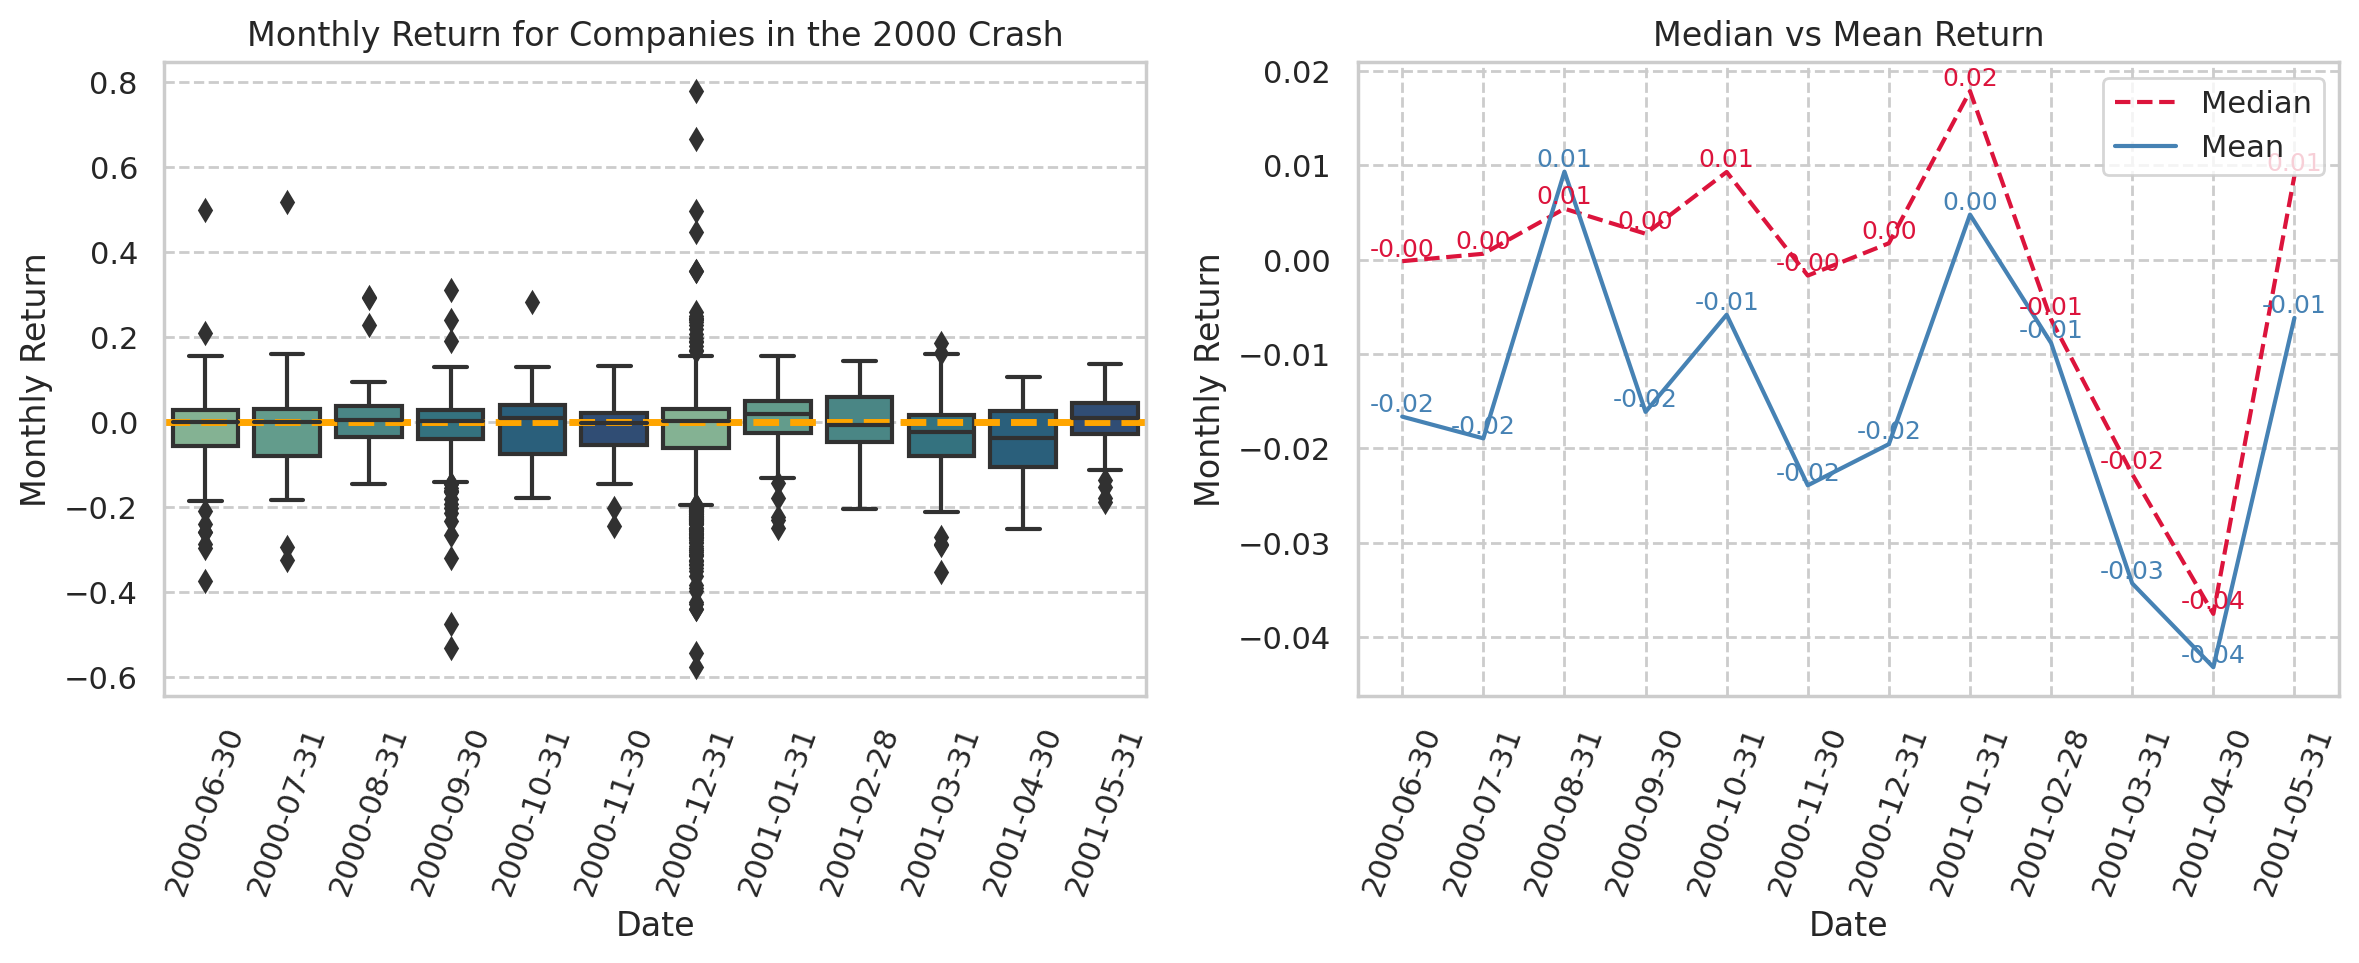

In [ ]:
# Analyzing stock returns over the crash period
palette = sns.color_palette('crest')

merged_2000 = merged_2000.sort_values('datadate')
median_return = merged_2000['RET'].median()
mean_return = merged_2000['RET'].mean()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# Boxplot on avg RET distribution
sns.boxplot(x='datadate', y='RET', data=merged_2000, palette=palette, ax=ax1)
ax1.axhline(y=median_return, color='orange', linestyle='--', linewidth=2.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return')
ax1.set_xticklabels(labels=merged_2000['datadate'].unique(), rotation=70)
ax1.set_title('Monthly Return for Companies in the 2000 Crash')
# Line plot on avg vs median RET comparison
x = merged_2000['datadate'].unique()
y_median = merged_2000.groupby('datadate')['RET'].median().values
y_mean = merged_2000.groupby('datadate')['RET'].mean().values
ax2.plot(x, y_median, color='crimson', linestyle='--', label='Median')
ax2.plot(x, y_mean, color='steelblue', linestyle='-', label='Mean')
ax2.set_xlabel('Date')
ax2.set_ylabel('Monthly Return')
ax2.set_xticklabels(labels=x, rotation=70)
ax2.set_title('Median vs Mean Return')
ax2.legend()

for i, (xi, yi) in enumerate(zip(x, y_median)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='crimson')
for i, (xi, yi) in enumerate(zip(x, y_mean)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='steelblue')
fig.tight_layout()
plt.show()

- Monthly average returns from $06/30/2000 - 05/31/2001$ uniformly centered around 0%, with 12/31/2000 being the most volatile period where there are many outliers on both ends of the return spectrum (especially on the downside). The orange dotted line depicts the median stock return over the entire crash period, which is also around 0%.
- Market experienced significant sell-off from 01/2001-04/2001, with median $R_i$ dropping from 2% to -4%. This may be induced by the bust of the Dotcom bubble.

### **2008 Great Recession & Financial Crisis (Jan 2008 – Feb 2009)**

In [ ]:
Rt_2008 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/CRSP-2004-2008.csv')
display(Rt_2008.info())
crash_data = Rt_2008[(Rt_2008["date"] >= '2008-08-31') & (Rt_2008["date"] <= '2008-11-31')]
crash_return = pd.DataFrame(crash_data.groupby('TICKER')['RET'].mean()).reset_index()
display(crash_return)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406217 entries, 0 to 406216
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PERMNO  406217 non-null  int64  
 1   date    406217 non-null  object 
 2   TICKER  406217 non-null  object 
 3   CUSIP   406217 non-null  object 
 4   RET     406217 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 15.5+ MB


None

,TICKER,RET
0,A,-0.183331
1,AA,-0.279165
2,AAC,-0.327723
3,AACC,-0.153070
4,AAI,0.176456
...,...,...
6868,ZRBA,-0.119476
6869,ZTR,-0.092843
6870,ZUMZ,-0.126290
6871,ZVUE,-0.176083


- **`crash_data`**: Keeps only stock returns for Sept 2008 - Nov 2008 since this is the timeframe for the third crash event. 
- **`crash_return`:** Calculates average monthly stock return for period between $09/2008-11/2008$ for each ticker. In this dataset, there are 6873 tickers and their respective returns in the crash period. 

- Combine `crash_return` with the corresponding `Compustat-2007.csv` file into a merged dataset for regression analysis. Since tickers in the Compustat dataset is not standardized, we need some data cleaning & transformation before merging on `tic`. 

In [ ]:
Compustat_2008 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/Compustat-2007.csv')
# merge 2 df on ticker
merged_2008 = pd.merge(crash_return, Compustat_2008, left_on='TICKER', right_on='tic')
merged_2008 = merged_2008.drop(['gvkey', 'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'costat'], axis=1)
merged_2008['se'] = merged_2008['at'] - merged_2008['lt']
display(merged_2008.head())
display(merged_2008.info())

,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
0,A,-0.183331,2007-10-31,2007,INDL,3671.000,7554.000,1826.000,2254.000,2087.000,1663.000,4320.000,638.000,2580.000,5420.000,3234.000
1,AACC,-0.153070,2007-12-31,2007,INDL,NaN,394.653,10.475,191.442,189.750,NaN,272.234,20.407,17.453,247.998,122.419
2,AAI,0.176456,2007-12-31,2007,INDL,479.937,2048.466,347.610,1884.509,958.218,508.134,1602.116,52.683,49.434,2309.983,446.350
3,AAME,-0.236254,2007-12-31,2007,INDL,NaN,458.254,56.546,98.986,52.988,NaN,370.460,7.252,9.359,122.972,87.794
4,AANB,-0.105233,2007-12-31,2007,INDL,NaN,445.875,48.763,13.859,14.769,NaN,414.436,3.059,6.532,31.876,31.439


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3589 entries, 0 to 3588
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TICKER    3589 non-null   object 
 1   RET       3589 non-null   float64
 2   datadate  3589 non-null   object 
 3   fyear     3589 non-null   int64  
 4   indfmt    3589 non-null   object 
 5   act       2760 non-null   float64
 6   at        3589 non-null   float64
 7   che       3589 non-null   float64
 8   cogs      3588 non-null   float64
 9   dltt      3582 non-null   float64
 10  lct       2775 non-null   float64
 11  lt        3583 non-null   float64
 12  ni        3589 non-null   float64
 13  re        3495 non-null   float64
 14  sale      3589 non-null   float64
 15  se        3583 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 476.7+ KB


None

- After merging on ticker symbol, we have 3589 companies left compared to the original 6873 companies in `crash_return`. Columns with null values are `act`, `cogs`, `dltt`, `lct`, `lt`, `se`, and `re`. **Since financial data have relationships with one another, missing values can be predicted using other columns through regression.** We choose to use regression imputation of missing values instead of winsorizing or mean/median imputation since company-specific regression brings meanings meaning to numbers. Also, companies all have different scale and revenue size that bring challenges to winsorizing and simple imputation (i.e., distorting the big picture).

#### **Regression Imputation**

In [ ]:
#create copy of merged_2008 df for imputation of missing values
reg_data = merged_2008[['TICKER', 'datadate', 'act', 'cogs', 'dltt', 'lct', 're', 'che', 'lt', 'ni', 'sale', 'se']].copy()
reg_data = reg_data.dropna(subset=['che', 'ni', 'sale']) #independent variables

#seperate missings from complete data
complete_data = reg_data.dropna() #drop null values in training set
missing_data = reg_data[reg_data.isna().any(axis=1)] #use rows with null for training set

#define variables
X_cols = ['che', 'ni', 'sale']
y_cols = ['act', 'cogs', 'dltt', 'lct', 'lt', 'se', 're']

reg_model = LinearRegression()
reg_model.fit(complete_data[X_cols], complete_data[y_cols])
imputed_values = reg_model.predict(missing_data[X_cols])
merged_2008.loc[missing_data.index, y_cols] = imputed_values
display(merged_2008.head())

,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
0,A,-0.183331,2007-10-31,2007,INDL,3671.000000,7554.000,1826.000,2254.000000,2087.000000,1663.000000,4320.000000,638.000,2580.000000,5420.000,3234.000000
1,AACC,-0.153070,2007-12-31,2007,INDL,158.058171,394.653,10.475,37.874208,460.428239,65.485209,738.916185,20.407,-244.969353,247.998,479.461024
2,AAI,0.176456,2007-12-31,2007,INDL,479.937000,2048.466,347.610,1884.509000,958.218000,508.134000,1602.116000,52.683,49.434000,2309.983,446.350000
3,AAME,-0.236254,2007-12-31,2007,INDL,198.995478,458.254,56.546,-73.138654,435.413657,63.614874,676.631569,7.252,-282.946081,122.972,429.839738
4,AANB,-0.105233,2007-12-31,2007,INDL,170.961174,445.875,48.763,-141.805512,425.896383,40.206288,636.148728,3.059,-309.053852,31.876,402.707892


- **Observation:** Previously, before the regression imputation of `merged_2008` df, we saw that `act`, `cogs`, `dltt`, `lct`, `lt`, `se`, `re` all have NaNs. Now, with company-specific regression imputation, they have 3589 complete observations. 
    - ***Rationality Check:*** For example, tickers `AACC`, `AAME`, and `AANB` all have missing values in `act` and `lct`. After regression imputation, it makes sense to see a smaller current assets compared to total assets, and a smaller current liabilities compared to total liabilities. 
- We need to further winsorize variables with min of 0 to avoid infinite values in calculating ratios. 

In [ ]:
# Winsorize 'act', 'dltt', 'lct', and 'lt'
merged_2008['act'] = winsorize(merged_2008['act'], limits=(0.05,0.05))
merged_2008['dltt'] = winsorize(merged_2008['dltt'], limits=(0.05,0.05))
merged_2008['lct'] = winsorize(merged_2008['lct'], limits=(0.05,0.05))
merged_2008['lt'] = winsorize(merged_2008['lt'], limits=(0.05,0.05))
merged_2008['cogs'] = winsorize(merged_2008['cogs'], limits=(0.05,0.05))
# merged_2008['at'] = winsorize(merged_2008['at'], limits=(0.05,0.05))
merged_2008['sale'] = winsorize(merged_2008['sale'], limits=(0.05,0.05))
merged_2008['che'] = winsorize(merged_2008['che'], limits=(0.05,0.05))

In [ ]:
# ROA
merged_2008['ROA'] = merged_2008['ni']/merged_2008['at']
# ROE
merged_2008['ROE'] = merged_2008['ni']/merged_2008['se']
merged_2008['ROE'] = np.log(merged_2008['ROE'])
# Asset turnover
merged_2008['asset_turn'] = merged_2008['sale']/merged_2008['at']
merged_2008['asset_turn'] = np.log(merged_2008['asset_turn'])
# Net profit margin
merged_2008['net_margin'] = merged_2008['ni']/merged_2008['sale']
merged_2008['net_margin'] = np.log(merged_2008['net_margin'])
# Long Tem Debt to Total Assets Ratio
merged_2008['debt_asset'] = merged_2008['dltt']/merged_2008['at']
merged_2008['debt_asset'] = np.log(merged_2008['debt_asset'])
display(merged_2008.describe())

,RET,fyear,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se,ROA,ROE,asset_turn,net_margin,debt_asset
count,3589.000000,3589.0,3589.000000,3.589000e+03,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,2812.000000,3589.000000,2765.000000,2892.000000
mean,-0.145368,2007.0,941.763287,1.327378e+04,296.160169,1150.461426,524.327824,618.500088,1555.348141,313.907147,1307.390557,2032.624885,2126.895513,0.015674,-2.392025,-0.728477,-2.473591,-2.056225
std,0.121752,0.0,1764.888538,1.124949e+05,582.953132,2322.223861,880.553421,1278.715647,2891.386997,1704.046303,9064.858901,3932.429371,8981.796094,0.546236,1.304718,1.167348,1.075933,1.904983
min,-0.931427,2007.0,15.678000,1.623000e+00,1.800000,-129.658945,0.000000,5.071000,6.829000,-38732.000000,-121846.164000,12.052000,-81250.680793,-6.783386,-10.026893,-6.052146,-9.614027,-12.589664
25%,-0.217597,2007.0,92.873000,1.720530e+02,14.982000,15.817000,0.749000,24.358000,60.241000,0.816000,-174.867000,72.371000,96.873000,0.002838,-2.939063,-1.440551,-3.064087,-2.661172
50%,-0.138141,2007.0,206.226970,6.720730e+02,57.968000,132.408000,195.904000,84.820000,608.191535,17.103000,11.937000,312.438000,399.290417,0.032363,-2.188132,-0.463243,-2.415539,-1.661525
75%,-0.066428,2007.0,727.269000,2.751780e+03,221.686000,881.666000,485.879000,402.326000,1160.907000,104.328000,338.845000,1587.307000,890.700000,0.077989,-1.660434,0.129445,-1.848170,-0.970538
max,1.334058,2007.0,7091.607974,2.950316e+06,2328.300000,9024.894000,3452.682000,5129.200000,11586.000000,40610.000000,230507.000000,15336.574000,151833.171000,24.976830,6.759929,3.227047,3.084038,4.726753


In [ ]:
import statsmodels.api as sm

X = merged_2008[['ROA', 'ROE', 'asset_turn', 'net_margin', 'debt_asset']].fillna(0)
X = sm.add_constant(X)
y = merged_2008['RET']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RET   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     36.38
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.81e-36
Time:                        04:07:45   Log-Likelihood:                 2554.4
No. Observations:                3589   AIC:                            -5097.
Df Residuals:                    3583   BIC:                            -5060.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1785      0.004    -41.350      0.000      -0.187      -0.170
ROA            0.0133      0.004      3.578      0.000       0.006       0.021
ROE           -0.0067      0.003     -2.606      0.009      -0.012      -0.002
asset_turn    -0.0159      0.002     -6.667      0.000      -0.021      -0.011
net_margin    -0.0051      0.003     -1.917      0.055      -0.010       0.000
debt_asset     0.0006      0.001      0.523      0.601      -0.002       0.003
==============================================================================
Omnibus:                     1017.983   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25524.835
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                      15.972   Cond. No.                         9.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model based on 5 independent variables ROA, ROE, asset turnover, net profit margin, and debt-to-asset ratio only has an $R^2$ of 0.054 (*slight improvement on the model in the 1987 market crash*). Therefore, the model only explains about 5.4% of the variations in the average monthly return of companies during the 2008 housing crisis. This means there are many other exogenous factors at play that cannot be explained by the model alone, such as the reckless lending behavior centered around MBS (mortgage-backed securities) that cannot be calculated based on our datasets.

- Regardless of model performance, both ROE and Debt-to-Asset ratio are not statistically significant (p-value of 0.123 and 0.617 respectively), while the rest all have p-value < 0.05. 

- **Interpretation:** A constant of -0.1799 means that if all the ratios for a company equal to 0, then the expected monthly avg return should be -17.99% during the 2008 housing crisis (a much worse average return compared to the previous crashes). A 1 unit increase in ROA indicates a 4.39 percentage point change on returns on average, holding other things equal. A 1 unit increase in ROE indicates a -0.4 percentage drop in returns on average. The same logic follows for the remaining ratios. 
    - ROA has a positive coefficient because it's a measure of profitability - higher profitability should create higher stock returns over time.

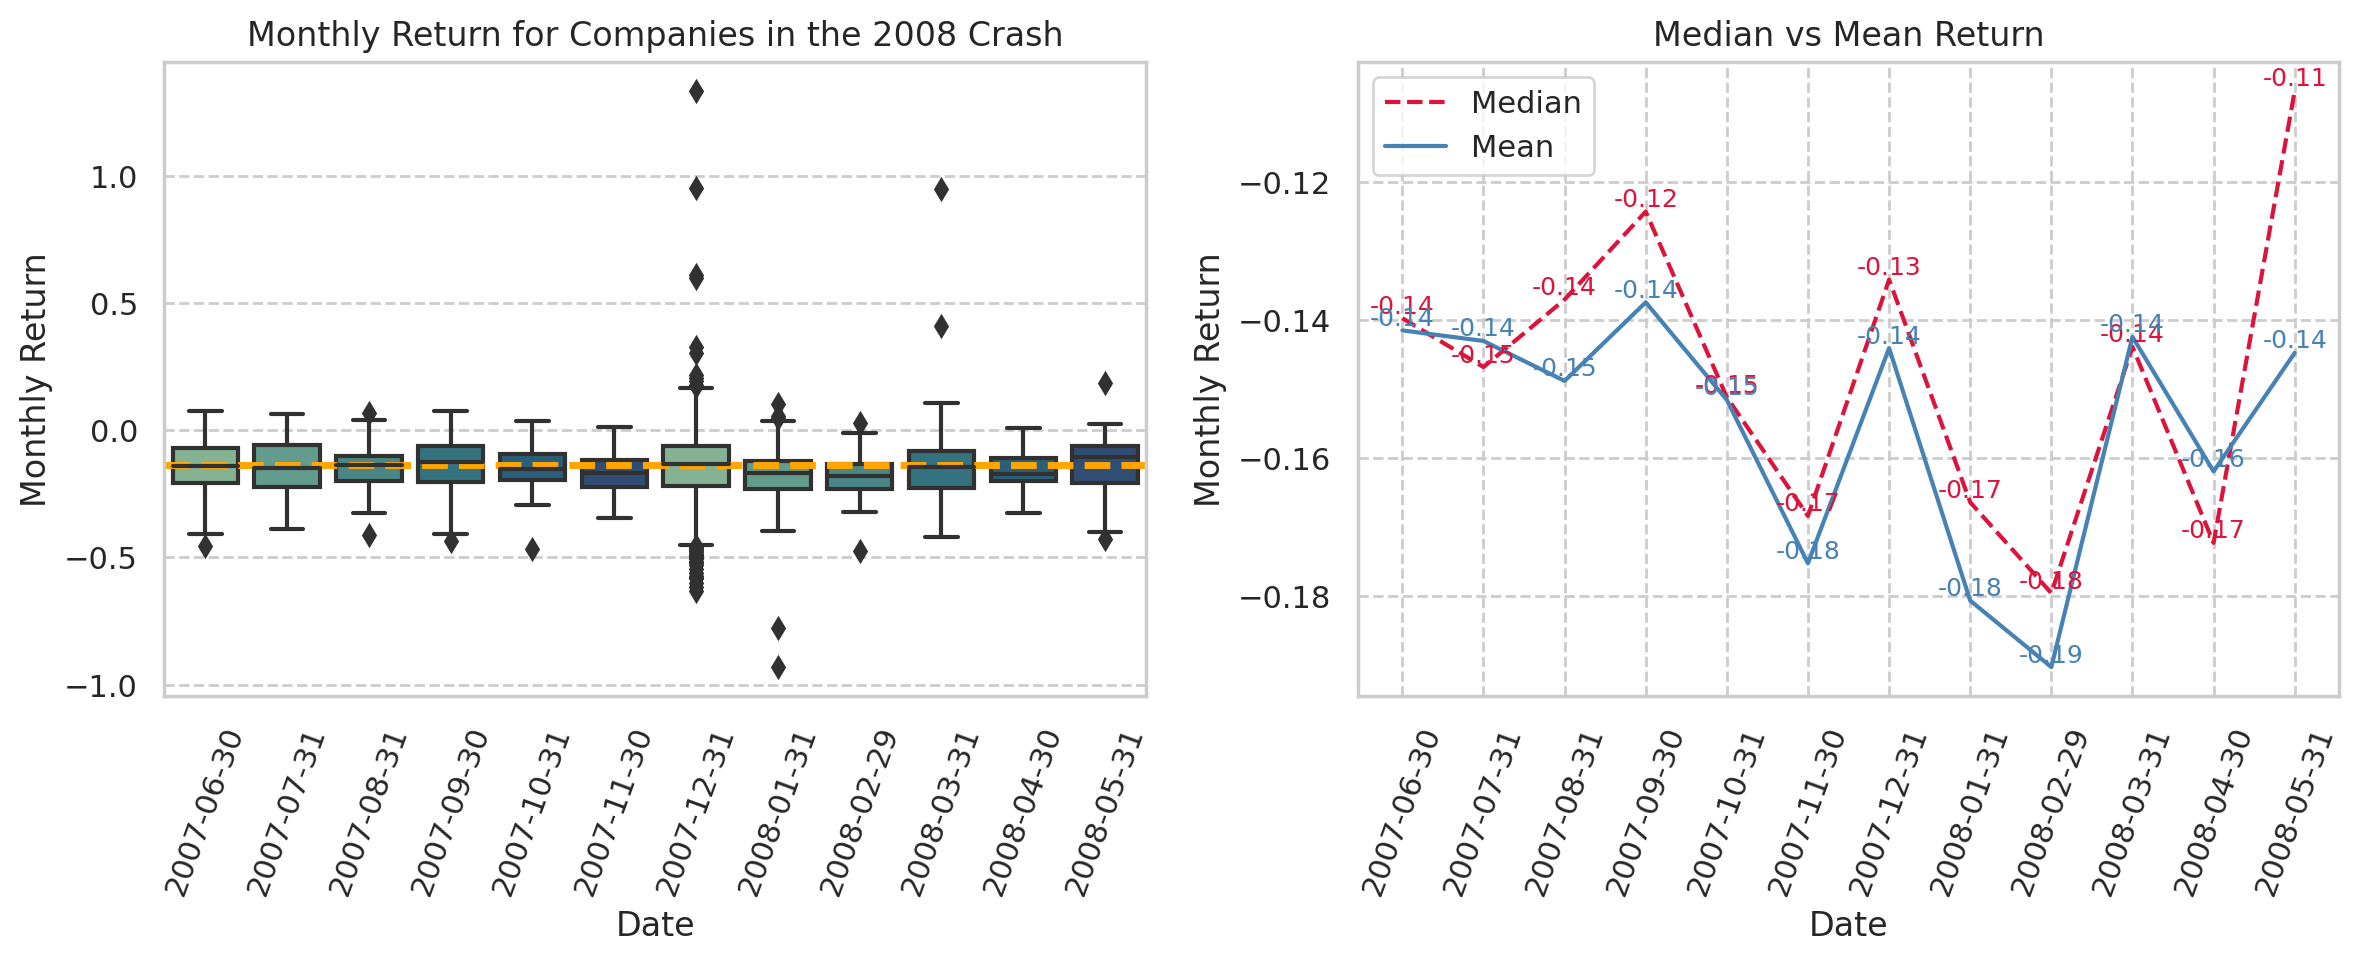

In [ ]:
# Analyzing stock returns over the crash period
palette = sns.color_palette('crest')
merged_2008 = merged_2008.sort_values('datadate')
median_return = merged_2008['RET'].median()
mean_return = merged_2008['RET'].mean()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# Boxplot on avg RET distribution
sns.boxplot(x='datadate', y='RET', data=merged_2008, palette=palette, ax=ax1)
ax1.axhline(y=median_return, color='orange', linestyle='--', linewidth=2.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return')
ax1.set_xticklabels(labels=merged_2008['datadate'].unique(), rotation=70)
ax1.set_title('Monthly Return for Companies in the 2008 Crash')
# Line plot on avg vs median RET comparison
x = merged_2008['datadate'].unique()
y_median = merged_2008.groupby('datadate')['RET'].median().values
y_mean = merged_2008.groupby('datadate')['RET'].mean().values
ax2.plot(x, y_median, color='crimson', linestyle='--', label='Median')
ax2.plot(x, y_mean, color='steelblue', linestyle='-', label='Mean')
ax2.set_xlabel('Date')
ax2.set_ylabel('Monthly Return')
ax2.set_xticklabels(labels=x, rotation=70)
ax2.set_title('Median vs Mean Return')
ax2.legend()

for i, (xi, yi) in enumerate(zip(x, y_median)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='crimson')
for i, (xi, yi) in enumerate(zip(x, y_mean)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='steelblue')
fig.tight_layout()
plt.show()

- Monthly average returns from $06/30/2007 - 05/31/2008$ uniformly fell below 0%, with 12/31/2007 being the most volatile period where many outliers on both ends of the return spectrum (especially on the downside). The orange dotted line depicts the median stock return over the entire crash period, which is also below 0%.
- Stock returns consistently varied in the deeply negative region, from -12% to -19%, representing the significnt impact of the housing market meltdown in 2008.

### **2020 The Covid Shock (Feb 2020 – March 2020)**

In [ ]:
Rt_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/CRSP-2016-2020.csv')
display(Rt_2020['TICKER'].nunique())
crash_data = Rt_2020[(Rt_2020["date"] >= '2020-01-31') & (Rt_2020["date"] <= '2020-03-31')]
crash_return = pd.DataFrame(crash_data.groupby('TICKER')['RET'].mean()).reset_index()
display(crash_return)

10634

,TICKER,RET
0,A,-0.055704
1,AA,-0.304358
2,AAAU,0.012644
3,AACG,-0.113066
4,AADR,-0.088956
...,...,...
7649,ZUO,-0.155019
7650,ZVO,-0.063260
7651,ZYME,-0.078511
7652,ZYNE,-0.140421


- **`crash_data`**: Keeps only stock returns for 02/2020 - 03/2020 since this is the timeframe for the fourth crash event. This dataset contains 7654 tickers out of the original 10634 tickers.

- **`crash_return`:** Calculates average monthly stock return for period between $02/2020 - 03/2020$ for each ticker. In this dataset, there are 7654 tickers and their respective returns in the crash period. 

- Combine `crash_return` with the corresponding `Compustat-2019.csv` file into a merged dataset for regression analysis. Since tickers in the Compustat dataset is not standardized, we need some data cleaning & transformation before merging on `tic`. 

In [ ]:
Compustat_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/Compustat-2019.csv')
# merge 2 df on ticker
merged_2020 = pd.merge(crash_return, Compustat_2020, left_on='TICKER', right_on='tic')
merged_2020 = merged_2020.drop(['gvkey', 'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'costat'], axis=1)
merged_2020['se'] = merged_2020['at'] - merged_2020['lt']
display(merged_2020.iloc[5:7])
display(merged_2020.info())

,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
5,AAME,0.031242,2019-12-31,2019,INDL,NaN,377.626,12.893,195.460,39.413,NaN,259.232,-0.386,46.479,198.179,118.394
6,AAN,-0.239272,2019-12-31,2019,INDL,NaN,1940.331,48.773,83.791,676.837,NaN,1102.550,28.099,NaN,1784.477,837.781


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4099 entries, 0 to 4098
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TICKER    4099 non-null   object 
 1   RET       4099 non-null   float64
 2   datadate  4099 non-null   object 
 3   fyear     4099 non-null   int64  
 4   indfmt    4099 non-null   object 
 5   act       3174 non-null   float64
 6   at        4099 non-null   float64
 7   che       4099 non-null   float64
 8   cogs      4099 non-null   float64
 9   dltt      4089 non-null   float64
 10  lct       3177 non-null   float64
 11  lt        4092 non-null   float64
 12  ni        4099 non-null   float64
 13  re        3990 non-null   float64
 14  sale      4099 non-null   float64
 15  se        4092 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 544.4+ KB


None

- After merging on ticker symbol, we have 4099 companies left compared to the original 7654 companies in `crash_return`. Columns with null values are `act`, `dltt`, `lct`, `lt`, `se`, and `re`. **Since financial data have relationships with one another, missing values can be predicted using other columns through regression.**

#### **Regression Imputation**

In [ ]:
#create copy of merged_2020 df for imputation of missing values
reg_data = merged_2020[['TICKER', 'datadate', 'act', 'cogs', 'dltt', 'lct', 're', 'che', 'lt', 'ni', 'sale', 'se']].copy()
reg_data = reg_data.dropna(subset=['cogs', 'che', 'ni', 'sale']) #independent variables

complete_data = reg_data.dropna() #drop null values in training set
missing_data = reg_data[reg_data.isna().any(axis=1)] #use rows with null for training set

X_cols = ['cogs', 'che', 'ni', 'sale']
y_cols = ['act', 'dltt', 'lct', 'lt', 'se', 're']

reg_model = LinearRegression()
reg_model.fit(complete_data[X_cols], complete_data[y_cols])
imputed_values = reg_model.predict(missing_data[X_cols])
merged_2020.loc[missing_data.index, y_cols] = imputed_values
display(merged_2020.describe())
display(merged_2020.iloc[5:7])

,RET,fyear,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
count,4099.000000,4099.0,4.099000e+03,4.099000e+03,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000
mean,-0.110313,2019.0,4.233441e+03,1.885168e+04,2517.192387,3217.968623,2148.488958,2408.898600,5256.603624,395.269641,1108.972531,5028.319678,3647.047826
std,0.139200,0.0,3.428814e+04,1.267400e+05,27429.758265,14252.494848,8369.895790,13368.846701,17982.568877,2059.295104,12884.927626,19605.838209,16906.751524
min,-0.593137,2019.0,2.180000e-01,9.690000e-01,0.000000,-4.657000,-144987.001097,0.183000,0.401000,-10137.000000,-298907.241092,0.007000,-9599.000000
25%,-0.173747,2019.0,1.564420e+02,3.039130e+02,27.192000,48.205500,29.031000,66.334500,155.522000,-12.398000,-188.060829,104.671500,132.051500
50%,-0.114727,2019.0,4.545380e+02,1.494915e+03,115.624000,272.654000,685.000000,237.549625,1132.095533,21.354000,-3.590000,579.920000,677.821517
75%,-0.055689,2019.0,1.272564e+03,6.081578e+03,418.075500,1483.290500,1318.435379,774.469000,2657.489000,175.134000,542.778463,2569.829000,1583.235808
max,2.482054,2019.0,1.160739e+06,3.083139e+06,953005.136000,383618.000000,173113.000000,386352.039406,349735.000000,55256.000000,401848.000000,521426.000000,408103.468661


,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
5,AAME,0.031242,2019-12-31,2019,INDL,358.067889,377.626,12.893,195.460,734.574050,177.983479,1112.845634,-0.386,-138.852667,198.179,630.455778
6,AAN,-0.239272,2019-12-31,2019,INDL,696.219736,1940.331,48.773,83.791,2394.459138,821.044640,4156.987697,28.099,259.650121,1784.477,2025.711992


- **Observation:** Previously, before the regression imputation of `merged_2020` df, we saw that `act`, `cogs`, `dltt`, `lct`, `lt`, `se`, `re` all have NaNs. Now, with company-specific regression imputation, they have 4099 complete observations. 
    - ***Rationality Check:*** For example, tickers `AAME` and `AAN` all have missing values in `act` and `lct`. After regression imputation, it makes sense to see a smaller current assets compared to total assets, and a smaller current liabilities compared to total liabilities. 
- We need to further winsorize variables with min of 0 to avoid infinite values in calculating ratios. 

In [ ]:
# Winsorize 'act', 'dltt', 'lct', and 'lt'
merged_2020['act'] = winsorize(merged_2020['act'], limits=(0.05,0.05))
merged_2020['dltt'] = winsorize(merged_2020['dltt'], limits=(0.05,0.05))
merged_2020['lct'] = winsorize(merged_2020['lct'], limits=(0.05,0.05))
merged_2020['lt'] = winsorize(merged_2020['lt'], limits=(0.05,0.05))
merged_2020['cogs'] = winsorize(merged_2020['cogs'], limits=(0.05,0.05))
merged_2020['at'] = winsorize(merged_2020['at'], limits=(0.05,0.05))
merged_2020['sale'] = winsorize(merged_2020['sale'], limits=(0.05,0.05))
merged_2020['che'] = winsorize(merged_2020['che'], limits=(0.05,0.05))

In [ ]:
# ROA
merged_2020['ROA'] = merged_2020['ni']/merged_2020['at']
# ROE
merged_2020['ROE'] = merged_2020['ni']/merged_2020['se']
merged_2020['ROE'] = np.log(merged_2020['ROE'])
# Asset turnover
merged_2020['asset_turn'] = merged_2020['sale']/merged_2020['at']
merged_2020['asset_turn'] = np.log(merged_2020['asset_turn'])
# Net profit margin
merged_2020['net_margin'] = merged_2020['ni']/merged_2020['sale']
merged_2020['net_margin'] = np.log(merged_2020['net_margin'])
# Long Tem Debt to Total Assets Ratio
merged_2020['debt_asset'] = merged_2020['dltt']/merged_2020['at']
merged_2020['debt_asset'] = np.log(merged_2020['debt_asset'])
display(merged_2020.describe())

,RET,fyear,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se,ROA,ROE,asset_turn,net_margin,debt_asset
count,4099.000000,4099.0,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,4099.000000,2699.000000,4099.000000,2651.000000,3888.000000
mean,-0.110313,2019.0,1493.607472,7061.510470,526.739076,1702.132777,1450.611114,1069.751038,3225.838801,395.269641,1108.972531,2914.285161,3647.047826,-0.041352,-2.295139,-0.996943,-2.339114,-1.739229
std,0.139200,0.0,2602.516217,13272.948286,1000.970565,3190.432579,2449.488767,2094.215308,5804.134893,2059.295104,12884.927626,5370.336433,16906.751524,0.254110,1.383217,1.139824,1.187851,1.476408
min,-0.593137,2019.0,13.893000,25.199000,2.230000,4.716000,0.000000,5.538000,8.836000,-10137.000000,-298907.241092,5.020000,-9599.000000,-4.197268,-9.101629,-6.715193,-10.686361,-9.755848
25%,-0.173747,2019.0,156.442000,303.913000,27.192000,48.205500,29.031000,66.334500,155.522000,-12.398000,-188.060829,104.671500,132.051500,-0.040258,-2.966064,-1.613374,-2.945128,-2.314568
50%,-0.114727,2019.0,454.538000,1494.915000,115.624000,272.654000,685.000000,237.549625,1132.095533,21.354000,-3.590000,579.920000,677.821517,0.014727,-2.205144,-0.813068,-2.203024,-1.459032
75%,-0.055689,2019.0,1272.564000,6081.578000,418.075500,1483.290500,1318.435379,774.469000,2657.489000,175.134000,542.778463,2569.829000,1583.235808,0.055216,-1.622820,-0.165517,-1.529513,-0.869213
max,2.482054,2019.0,10484.193000,52453.392000,4015.000000,12360.700000,9676.000000,8484.585000,23271.987310,55256.000000,401848.000000,20972.000000,408103.468661,1.901742,8.898658,2.318443,2.902155,3.431035


In [ ]:
import statsmodels.api as sm

X = merged_2020[['ROA', 'ROE', 'asset_turn', 'net_margin', 'debt_asset']].fillna(0)
X = sm.add_constant(X)
y = merged_2020['RET']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RET   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.49
Date:                Tue, 02 May 2023   Prob (F-statistic):           4.65e-12
Time:                        04:07:48   Log-Likelihood:                 2297.9
No. Observations:                4099   AIC:                            -4584.
Df Residuals:                    4093   BIC:                            -4546.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1192      0.005    -24.066      0.000      -0.129      -0.109
ROA           -0.0354      0.010     -3.708      0.000      -0.054      -0.017
ROE           -0.0007      0.003     -0.291      0.771      -0.006       0.004
asset_turn    -0.0011      0.002     -0.452      0.651      -0.006       0.004
net_margin     0.0044      0.003      1.667      0.096      -0.001       0.010
debt_asset    -0.0072      0.001     -4.881      0.000      -0.010      -0.004
==============================================================================
Omnibus:                     4777.637   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1327757.433
Skew:                           5.694   Prob(JB):                         0.00
Kurtosis:                      90.433   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model based on 5 independent variables ROA, ROE, asset turnover, net profit margin, and debt-to-asset ratio only has an $R^2$ of 0.015. Therefore, the model only explains about 1.5% of the variations in the average monthly return of companies during the 2020 COVID crisis. This means there are many other exogenous factors at play that cannot be explained by the model alone, such as the external COVID shock on stock market returns that is unrelated to company's fundamental metrics. 

- Regardless of model performance, both ROE, Asset Turnover ratio and Debt-to-Asset ratio are not statistically significant (p-value of 0.771, 0.651 and 0.096 respectively), while the rest all have p-value < 0.05. 

- **Interpretation:** A constant of -0.1192 means that if all the ratios for a company equal to 0, then the expected monthly avg return should be -11.92% during the 2020 COVID crisis. A 1 unit increase in ROA indicates a 3.54 percentage point drop on $Ret_{stock}$, holding other things equal. A 1 unit increase in Net Profit Margin indicates a 0.44 percentage increase in $Ret_{stock}$. The same logic follows for the remaining ratios. 

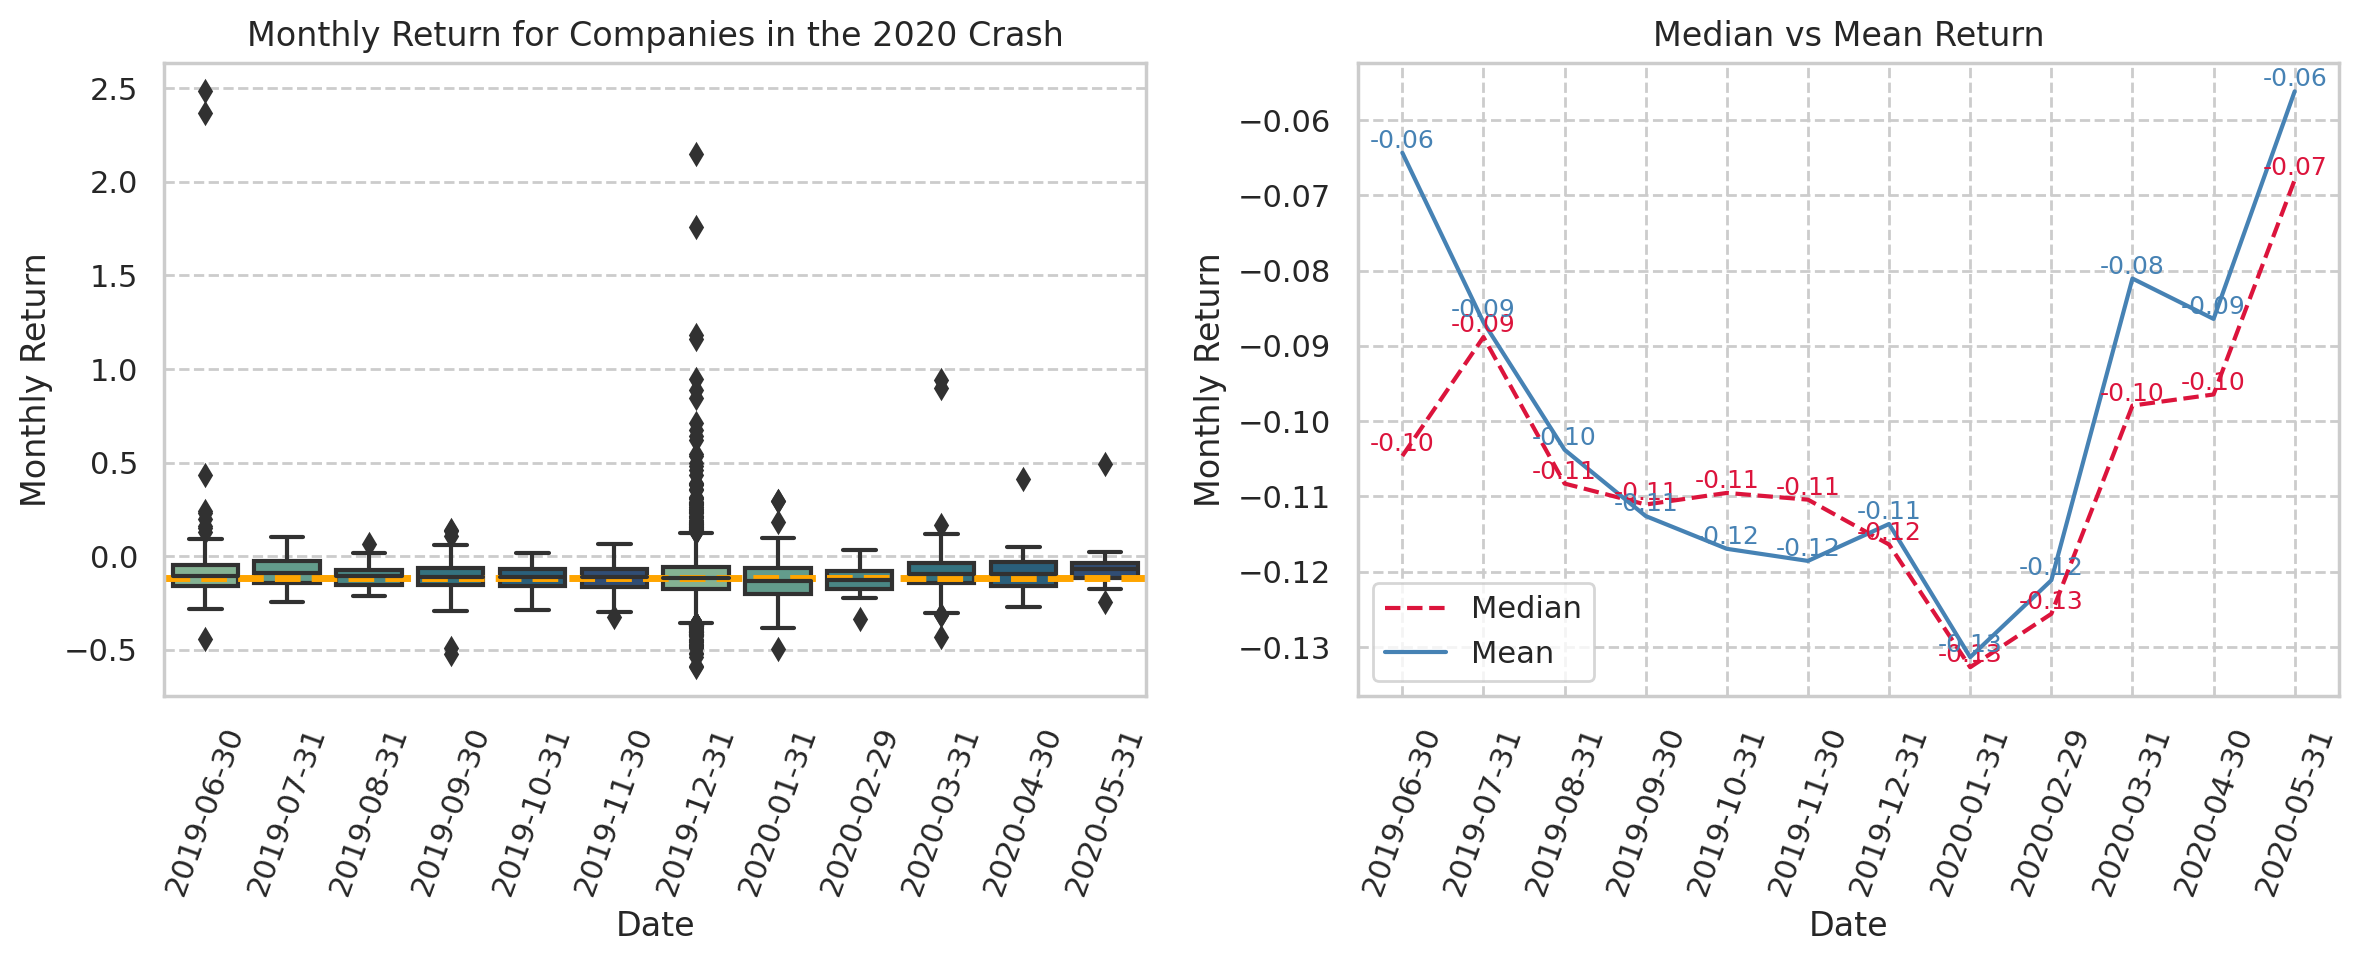

In [ ]:
# Analyzing stock returns over the crash period
palette = sns.color_palette('crest')
merged_2020 = merged_2020.sort_values('datadate')
median_return = merged_2020['RET'].median()
mean_return = merged_2020['RET'].mean()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# Boxplot on avg RET distribution
sns.boxplot(x='datadate', y='RET', data=merged_2020, palette=palette, ax=ax1)
ax1.axhline(y=median_return, color='orange', linestyle='--', linewidth=2.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return')
ax1.set_xticklabels(labels=merged_2020['datadate'].unique(), rotation=70)
ax1.set_title('Monthly Return for Companies in the 2020 Crash')
# Line plot on avg vs median RET comparison
x = merged_2020['datadate'].unique()
y_median = merged_2020.groupby('datadate')['RET'].median().values
y_mean = merged_2020.groupby('datadate')['RET'].mean().values
ax2.plot(x, y_median, color='crimson', linestyle='--', label='Median')
ax2.plot(x, y_mean, color='steelblue', linestyle='-', label='Mean')
ax2.set_xlabel('Date')
ax2.set_ylabel('Monthly Return')
ax2.set_xticklabels(labels=x, rotation=70)
ax2.set_title('Median vs Mean Return')
ax2.legend()

for i, (xi, yi) in enumerate(zip(x, y_median)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='crimson')
for i, (xi, yi) in enumerate(zip(x, y_mean)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='steelblue')
fig.tight_layout()
plt.show()

- Monthly average returns from $06/30/2019 - 05/31/2020$ are slightly below 0% on average, and the median return ($R_{median}$) represented by the orange dotted line also fell below 0%. **According to the data, the start of the COVID pandemic didn't seem to provoke a rapid sell-off and stock market crash at the beginning few months in 2020, which is a bit contradictory.** This may be caused by the limited stock return data in the merged_2020 dataset which only contains 4099 observations out of the original 7654 observations. 
- Market experienced continual sell-off from 07/2019-01/2020, with median $R_i$ dropping from -9% to -13%.

### **2022 “The End of Easy Money” (Jan 2022 – Sep 2022)**

In [ ]:
Rt_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/CRSP-2018-2022.csv')
display(Rt_2022['TICKER'].nunique())
crash_data = Rt_2022[(Rt_2022["date"] >= '2021-12-31') & (Rt_2022["date"] <= '2022-09-31')]
crash_return = pd.DataFrame(crash_data.groupby('TICKER')['RET'].mean()).reset_index()
display(crash_return)

12482

,TICKER,RET
0,A,-0.017877
1,AA,-0.006848
2,AAA,-0.001966
3,AAAU,-0.006082
4,AAC,0.001426
...,...,...
9989,ZWS,-0.031072
9990,ZY,-0.055981
9991,ZYME,-0.094351
9992,ZYNE,-0.127896


- **`crash_data`**: Keeps only stock returns for 01/2022-09/2022 since this is the timeframe for the fifth crash event. This dataset contains 9994 tickers out of the original 12482 tickers.

- **`crash_return`:** Calculates average monthly stock return for period between $01/2022-09/2022$ for each ticker. In this dataset, there are 9994 tickers and their respective returns in the crash period. 

- Combine `crash_return` with the corresponding `Compustat-2021.csv` file into a merged dataset for regression analysis. Since tickers in the Compustat dataset is not standardized, we need some data cleaning & transformation before merging on `tic`. 

In [ ]:
Compustat_2022 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/Compustat-2021.csv')
merged_2022 = pd.merge(crash_return, Compustat_2022, left_on='TICKER', right_on='tic')
merged_2022 = merged_2022.drop(['gvkey', 'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'costat'], axis=1)
# B/S equation: SE = Assets - Liabilities
merged_2022['se'] = merged_2022['at'] - merged_2022['lt']
display(merged_2022.iloc[4:8])
display(merged_2022.info())

,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
4,AAIC,-0.024652,2021-12-31,2021,INDL,NaN,803.036,531.935,12.333,125.680,NaN,578.909,-9.515,-1842.703,12.590,224.127
5,AAL,-0.031668,2021-12-31,2021,INDL,17336.0,66467.000,13421.000,27969.000,42181.000,19006.0,73807.000,-1993.000,-14580.000,29882.000,-7340.000
6,AAME,-0.015658,2021-12-31,2021,INDL,NaN,402.286,26.487,191.862,38.116,NaN,261.000,4.281,68.952,199.554,141.286
7,AAN,-0.071295,2021-12-31,2021,INDL,NaN,1441.265,22.832,97.701,309.834,NaN,723.099,109.934,97.807,1845.504,718.166


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4889 entries, 0 to 4888
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TICKER    4889 non-null   object 
 1   RET       4889 non-null   float64
 2   datadate  4889 non-null   object 
 3   fyear     4889 non-null   int64  
 4   indfmt    4889 non-null   object 
 5   act       3949 non-null   float64
 6   at        4889 non-null   float64
 7   che       4889 non-null   float64
 8   cogs      4889 non-null   float64
 9   dltt      4876 non-null   float64
 10  lct       3952 non-null   float64
 11  lt        4879 non-null   float64
 12  ni        4889 non-null   float64
 13  re        4782 non-null   float64
 14  sale      4889 non-null   float64
 15  se        4879 non-null   float64
dtypes: float64(12), int64(1), object(3)
memory usage: 649.3+ KB


None

- After merging on ticker symbol, we have 4889 companies left compared to the original 9994 companies in `crash_return`. Columns with null values are `act`, `dltt`, `lct`, `lt`, `se`, and `re`. **Since financial data have relationships with one another, missing values can be predicted using other columns through regression.**

#### **Regression Imputation**

In [ ]:
#create copy of merged_2022 df for imputation of missing values
reg_data = merged_2022[['TICKER', 'datadate', 'act', 'cogs', 'dltt', 'lct', 're', 'che', 'lt', 'ni', 'sale', 'se']].copy()
reg_data = reg_data.dropna(subset=['cogs', 'che', 'ni', 'sale']) #independent variables
complete_data = reg_data.dropna() #drop null values in training set
missing_data = reg_data[reg_data.isna().any(axis=1)] #use rows with null for training set
X_cols = ['cogs', 'che', 'ni', 'sale']
y_cols = ['act', 'dltt', 'lct', 'lt', 'se', 're']

reg_model = LinearRegression()
reg_model.fit(complete_data[X_cols], complete_data[y_cols])
imputed_values = reg_model.predict(missing_data[X_cols])
merged_2022.loc[missing_data.index, y_cols] = imputed_values
display(merged_2022.describe())
display(merged_2022.iloc[4:8])

,RET,fyear,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
count,4889.000000,4889.0,4.889000e+03,4.889000e+03,4.889000e+03,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000
mean,-0.033009,2021.0,5.007262e+03,1.872282e+04,3.019447e+03,3108.941583,2084.438425,2913.607828,5894.719272,518.634029,2016.282876,4963.380980,4609.052319
std,0.068307,0.0,4.194019e+04,1.334752e+05,3.271986e+04,14937.428209,8616.476586,19304.569978,23651.956694,2936.951653,14169.248080,21108.524946,30662.268330
min,-0.995690,2021.0,6.440000e-01,8.240000e-01,0.000000e+00,-3703.000000,-127766.328580,0.012000,0.012000,-9501.000000,-102034.000000,0.004000,-14846.000000
25%,-0.058531,2021.0,1.541290e+02,2.688950e+02,4.057700e+01,31.764000,15.431000,49.564000,107.136000,-25.578000,-211.719661,75.442000,119.336000
50%,-0.023618,2021.0,5.356720e+02,1.331006e+03,1.721140e+02,207.954000,440.525000,276.059322,1021.970000,15.941000,-25.700000,477.018000,660.189465
75%,0.000202,2021.0,1.485000e+03,5.773599e+03,5.680000e+02,1276.636000,1232.036000,852.000000,2622.096000,197.000000,458.954302,2194.000000,1584.551691
max,0.574325,2021.0,1.269903e+06,3.743567e+06,1.007321e+06,418342.000000,174081.000000,553839.176491,524077.669142,94680.000000,378295.000000,569962.000000,916708.980201


,TICKER,RET,datadate,fyear,indfmt,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se
4,AAIC,-0.024652,2021-12-31,2021,INDL,1074.484529,803.036,531.935,12.333,810.179056,505.305616,1582.308382,-9.515,-98.060740,12.590,1045.124959
5,AAL,-0.031668,2021-12-31,2021,INDL,17336.000000,66467.000,13421.000,27969.000,42181.000000,19006.000000,73807.000000,-1993.000,-14580.000000,29882.000,-7340.000000
6,AAME,-0.015658,2021-12-31,2021,INDL,483.108740,402.286,26.487,191.862,901.385433,282.454722,1473.266014,4.281,-162.467161,199.554,653.390162
7,AAN,-0.071295,2021-12-31,2021,INDL,541.259815,1441.265,22.832,97.701,2329.572615,622.509137,3575.424760,109.934,123.041549,1845.504,1580.895418


- **Observation:** Previously, before the regression imputation of `merged_2022` df, we saw that `act`, `cogs`, `dltt`, `lct`, `lt`, `se`, `re` all have NaNs. Now, with company-specific regression imputation, they have 4889 complete observations. 
    - ***Rationality Check:*** For example, tickers `AAIC`, `AAME` and `AAN` all have missing values in `act` and `lct`. After regression imputation, it makes sense to see a smaller current assets compared to total assets, and a smaller current liabilities compared to total liabilities. 
- We need to further winsorize variables with min of 0 to avoid infinite values in calculating ratios. 

In [ ]:
# Winsorize 'act', 'dltt', 'lct', and 'lt'
merged_2022['act'] = winsorize(merged_2022['act'], limits=(0.05,0.05))
merged_2022['dltt'] = winsorize(merged_2022['dltt'], limits=(0.05,0.05))
merged_2022['lct'] = winsorize(merged_2022['lct'], limits=(0.05,0.05))
merged_2022['lt'] = winsorize(merged_2022['lt'], limits=(0.05,0.05))
merged_2022['cogs'] = winsorize(merged_2022['cogs'], limits=(0.05,0.05))
merged_2022['at'] = winsorize(merged_2022['at'], limits=(0.05,0.05))
merged_2022['sale'] = winsorize(merged_2022['sale'], limits=(0.05,0.05))
merged_2022['che'] = winsorize(merged_2022['che'], limits=(0.05,0.05))

In [ ]:
# ROA
merged_2022['ROA'] = merged_2022['ni']/merged_2022['at']
# ROE
merged_2022['ROE'] = merged_2022['ni']/merged_2022['se']
merged_2022['ROE'] = np.log(merged_2022['ROE'])
# Asset turnover
merged_2022['asset_turn'] = merged_2022['sale']/merged_2022['at']
merged_2022['asset_turn'] = np.log(merged_2022['asset_turn'])
# Net profit margin
merged_2022['net_margin'] = merged_2022['ni']/merged_2022['sale']
merged_2022['net_margin'] = np.log(merged_2022['net_margin'])
# Long Tem Debt to Total Assets Ratio
merged_2022['debt_asset'] = merged_2022['dltt']/merged_2022['at']
merged_2022['debt_asset'] = np.log(merged_2022['debt_asset'])
display(merged_2022.describe())

,RET,fyear,act,at,che,cogs,dltt,lct,lt,ni,re,sale,se,ROA,ROE,asset_turn,net_margin,debt_asset
count,4889.000000,4889.0,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,4889.000000,3019.000000,4889.000000,2963.000000,4889.000000
mean,-0.033009,2021.0,1742.032191,6708.455104,702.995994,1544.537365,1329.638055,1145.177223,3181.977515,518.634029,2016.282876,2719.542206,4609.052319,-0.049123,-2.131521,-1.172499,-2.127082,-2.372596
std,0.068307,0.0,3064.434497,12660.740701,1307.424509,2993.837833,2253.985626,2222.768973,5754.844548,2936.951653,14169.248080,5125.164935,30662.268330,0.327395,1.408287,1.257341,1.270821,2.440168
min,-0.995690,2021.0,17.257000,27.255000,4.244000,1.654000,0.010000,4.753000,6.738000,-9501.000000,-102034.000000,2.656000,-14846.000000,-9.912198,-9.634070,-6.921167,-10.119136,-15.427787
25%,-0.058531,2021.0,154.129000,268.895000,40.577000,31.764000,15.431000,49.564000,107.136000,-25.578000,-211.719661,75.442000,119.336000,-0.079410,-2.837963,-2.001346,-2.778394,-3.013092
50%,-0.023618,2021.0,535.672000,1331.006000,172.114000,207.954000,440.525000,276.059322,1021.970000,15.941000,-25.700000,477.018000,660.189465,0.013129,-2.034582,-0.934482,-2.017229,-1.699639
75%,0.000202,2021.0,1485.000000,5773.599000,568.000000,1276.636000,1232.036000,852.000000,2622.096000,197.000000,458.954302,2194.000000,1584.551691,0.067202,-1.378765,-0.257477,-1.261216,-0.982143
max,0.574325,2021.0,12386.380000,50142.143000,5257.835000,11468.000000,8776.000000,9024.000000,23137.000000,94680.000000,378295.000000,19695.303000,916708.980201,5.003007,5.531174,2.209695,4.014101,3.519926


In [ ]:
X = merged_2022[['ROA', 'ROE', 'asset_turn', 'net_margin', 'debt_asset']].fillna(0)
X = sm.add_constant(X)
y = merged_2022['RET']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RET   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     89.03
Date:                Tue, 02 May 2023   Prob (F-statistic):           6.87e-90
Time:                        04:07:50   Log-Likelihood:                 6397.4
No. Observations:                4889   AIC:                        -1.278e+04
Df Residuals:                    4883   BIC:                        -1.274e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0325      0.002    -15.439      0.000      -0.037      -0.028
ROA            0.0320      0.003     10.326      0.000       0.026       0.038
ROE           -0.0054      0.001     -5.225      0.000      -0.007      -0.003
asset_turn     0.0001      0.001      0.129      0.897      -0.002       0.002
net_margin    -0.0016      0.001     -1.437      0.151      -0.004       0.001
debt_asset     0.0034      0.000      8.604      0.000       0.003       0.004
==============================================================================
Omnibus:                     2125.733   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126084.565
Skew:                          -1.267   Prob(JB):                         0.00
Kurtosis:                      27.749   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model based on 5 independent variables ROA, ROE, asset turnover, net profit margin, and debt-to-asset ratio only has an $R^2$ of 0.084 (meaningful improvement of predictive power over previous crashes). Therefore, the model only explains about 8.4% of the variations in the average monthly return of companies during 2022 when the Fed ended "Quantitative Easing" and started the tightening cycle. 

- Regardless of model performance, both Asset Turnover ratio and Net Profit Margin are not statistically significant (p-value of 0.897 and 0.151 respectively), while the rest all have p-value < 0.05. 

- **Interpretation:** A constant of -0.0325 means that if all the ratios for a company equal to 0, then the expected monthly avg return should be -3.25% during the 2022 market crash. A 1 unit increase in ROA indicates a 3.2 percentage point drop on $Ret_{stock}$, holding other things equal. A 1 unit increase in Net Profit Margin indicates a 0.16 percentage point decrease in $Ret_{stock}$. The same logic follows for the remaining ratios. 

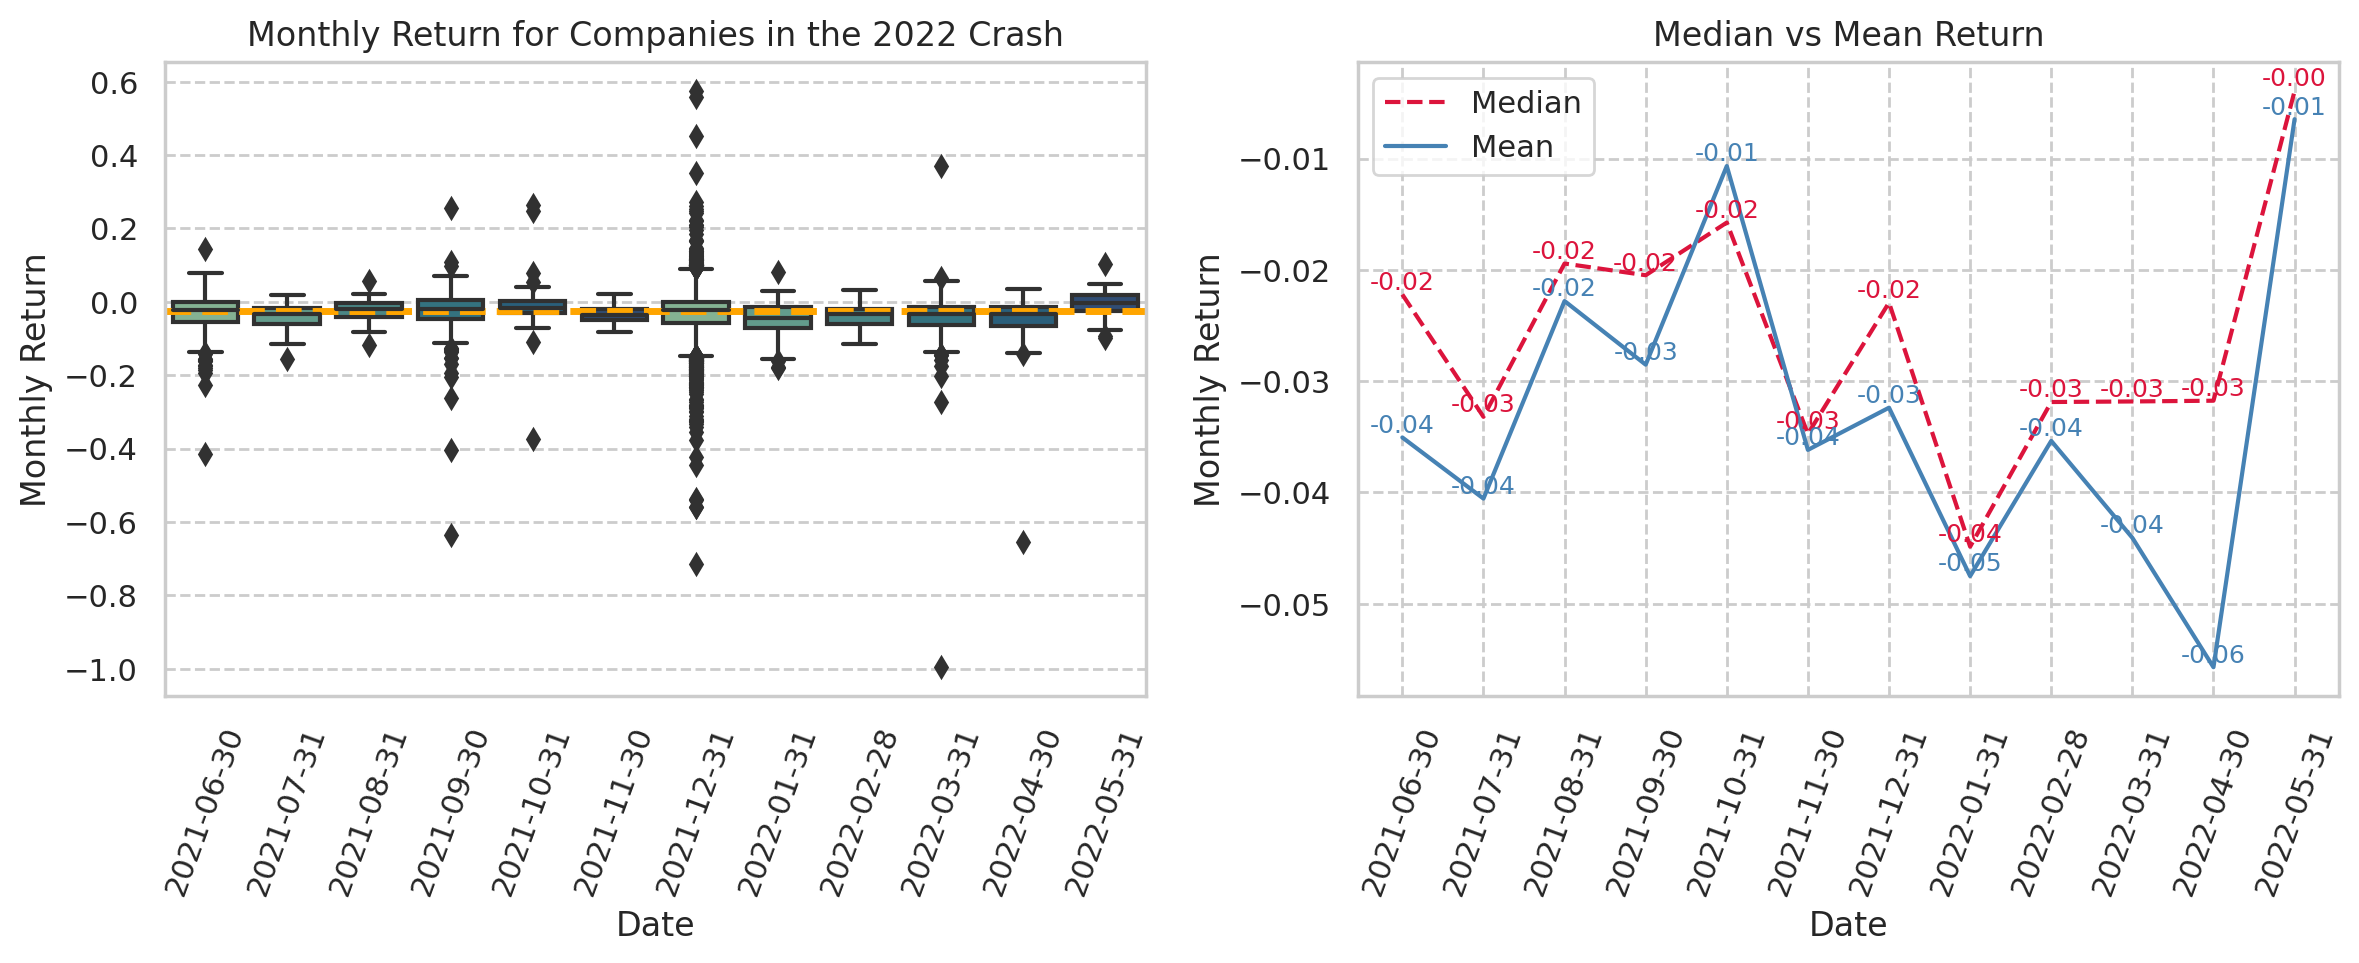

In [ ]:
# Analyzing stock returns over the crash period
palette = sns.color_palette('crest')
merged_2022 = merged_2022.sort_values('datadate')
median_return = merged_2022['RET'].median()
mean_return = merged_2022['RET'].mean()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# Boxplot on avg RET distribution
sns.boxplot(x='datadate', y='RET', data=merged_2022, palette=palette, ax=ax1)
ax1.axhline(y=median_return, color='orange', linestyle='--', linewidth=2.5)
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Return')
ax1.set_xticklabels(labels=merged_2022['datadate'].unique(), rotation=70)
ax1.set_title('Monthly Return for Companies in the 2022 Crash')
# Line plot on avg vs median RET comparison
x = merged_2022['datadate'].unique()
y_median = merged_2022.groupby('datadate')['RET'].median().values
y_mean = merged_2022.groupby('datadate')['RET'].mean().values
ax2.plot(x, y_median, color='crimson', linestyle='--', label='Median')
ax2.plot(x, y_mean, color='steelblue', linestyle='-', label='Mean')
ax2.set_xlabel('Date')
ax2.set_ylabel('Monthly Return')
ax2.set_xticklabels(labels=x, rotation=70)
ax2.set_title('Median vs Mean Return')
ax2.legend()
for i, (xi, yi) in enumerate(zip(x, y_median)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='crimson')
for i, (xi, yi) in enumerate(zip(x, y_mean)):
    ax2.text(xi, yi, f'{yi:.2f}', ha='center', va='bottom', fontsize=9, color='steelblue')
fig.tight_layout()
plt.show()

- Monthly average stock return $Ret_i$ follows a very different pattern compared to all previous periods, with a much wider return spectrum $[-1, 0.6]$. **This may be caused by the ridiculous amounts of overvaluation of tech companies during the "easy-money" period, and backfired when the Fed started lifting interest rates up to curb inflation.** $12/31/2021$ is particularly volatile compared to the other 4 crashes, with higher concentration of companies at the negative return territory. The overall median return for this period is slightly below 0%.

In [ ]:
# !apt-get install texlive-xetex

In [ ]:
!cp "./drive/MyDrive/Colab Notebooks/BA870 Financial Analytics/Assignment3/Assignment3_Tianao_Zhang.ipynb" ./
! jupyter nbconvert --to pdf Assignment3_Tianao_Zhang.ipynb

[NbConvertApp] Converting notebook Assignment3_Tianao_Zhang.ipynb to pdf
[NbConvertApp] Support files will be in Assignment3_Tianao_Zhang_files/
[NbConvertApp] Making directory ./Assignment3_Tianao_Zhang_files
[NbConvertApp] Making directory ./Assignment3_Tianao_Zhang_files
[NbConvertApp] Writing 186343 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 546970 bytes to Assignment3_Tianao_Zhang.pdf
